# From Data to Diagnosis: Predictive Modeling of Brain Tumor Types using Machine Learning

<hr>


*This notebook presents the project assignment for the subject Data Science and Data Analysis, focusing on an analysis of a brain tumor dataset.*

The project is organised in 8 parts:
1. Data Loading & Data Preprocessing - Cleaning and structuring the dataset for effective analysis.
2. EDA - Data Visualization - Identifying patterns and correlations within the data.
3. EDA - Feature engineering - Creating new features to enhance the predictive capability of the dataset.
4. Data Split - Dividing the data into training and testing sets to evaluate model performance.
5. Train model - Random Split - Training the model using a random split of the dataset, providing a baseline for performance comparison.
6. Train model - K-fold Cross Validation - Training and validating the model multiple times using different dataset partitions to improve reliability.
7. Feature Selection - Choosing the most relevant features to optimize model accuracy and reduce complexity.
8. Hyperparameter optimization - fine-tunning the model parameters to enhance predictive performance and minimize errors

For each part there are multiple codes for better organization and some markdowns with short explanation.

## Dataset
<hr>

For the purpose of this project we will be using the Brain Tumor dataset.

This dataset contains simulated data for brain tumor diagnosis, treatment, and patient details. It consists of 20 columns and 20,000 rows, providing information such as patient demographics, tumor characteristics, symptoms, treatment details, and follow-up requirements. The dataset is designed for machine learning projects focused on predicting the type and severity of brain tumors, as well as understanding various treatment methods and patient outcomes.

- The dataset is publicly available and can be downloaded from [**Kaggle**](https://www.kaggle.com/datasets/miadul/brain-tumor-dataset/data)

The dataset includes:

* Patient demographics:

  * Patient\_ID: Unique identifier for each patient
  * Age: Patient age in years
  * Gender: Biological sex (Male or Female)

* Tumor characteristics:

  * Tumor\_Type: Benign or Malignant tumor
  * Tumor\_Size: Size of the tumor in centimeters
  * Location: Tumor location in the brain (e.g., Frontal, Temporal)
  * Histology: Histological classification of the tumor (e.g., Astrocytoma, Glioblastoma)
  * Stage: Clinical stage of the tumor (I to IV)
  * Tumor\_Growth\_Rate: Tumor growth rate in cm/month

* Symptoms:

  * Symptom\_1, Symptom\_2, Symptom\_3: Observed neurological symptoms (e.g., Headache, Seizures)

* Treatment information:

  * Radiation\_Treatment: Whether the patient received radiation therapy
  * Surgery\_Performed: Whether surgical removal of the tumor was performed
  * Chemotherapy: Whether chemotherapy was administered
  * Treatment\_Response: Post-treatment status (Improved, Stable, or Worsened)
  * Follow\_Up\_Required: Indicates whether regular follow-up is required

* Patient history and diagnostics:

  * Family\_History: Family history of brain tumors (Yes/No)
  * MRI\_Result: Result of diagnostic MRI scan (Positive/Negative)

* Outcome indicators:

  * Survival\_Rate: Estimated patient survival rate (in percentage)

This dataset is designed for applying classification, regression, and exploratory data analysis techniques to better understand clinical patterns, predict outcomes, and support decision-making in brain tumor diagnosis and treatment.

**NOTE: The data in this dataset is synthetic and does not represent real patient information. It is intended for educational and research purposes in the field of healthcare analytics and machine learning.**

<br>

## 1. Data Loading & Data Preprocessing
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
data = pd.read_csv('brain_tumor_dataset.csv')

print(data.shape)

data.head(10)

(20000, 19)


,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
5,6,27,Male,Malignant,3.483837,Frontal,Astrocytoma,I,Vision Issues,Vision Issues,Headache,Yes,Yes,No,83.572069,2.261380,No,Negative,Yes
6,7,72,Male,Malignant,8.026672,Occipital,Meningioma,IV,Vision Issues,Headache,Nausea,Yes,No,Yes,69.825016,2.965008,No,Negative,No
7,8,61,Male,Benign,6.319362,Occipital,Astrocytoma,I,Headache,Seizures,Nausea,Yes,Yes,No,62.775921,2.269111,No,Negative,No
8,9,50,Male,Benign,8.075229,Temporal,Medulloblastoma,IV,Vision Issues,Vision Issues,Nausea,No,Yes,Yes,44.913090,1.208336,No,Negative,Yes
9,10,54,Male,Benign,8.549382,Frontal,Meningioma,I,Seizures,Vision Issues,Vision Issues,Yes,No,No,85.087322,2.764735,Yes,Positive,Yes


In [3]:
data.tail(10)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
19990,19991,38,Male,Malignant,1.199344,Parietal,Meningioma,I,Seizures,Nausea,Seizures,Yes,No,No,89.173300,1.158673,No,Negative,Yes
19991,19992,66,Male,Malignant,1.838305,Occipital,Medulloblastoma,I,Vision Issues,Seizures,Vision Issues,No,No,No,80.060746,1.730296,No,Negative,Yes
19992,19993,28,Female,Benign,5.071801,Temporal,Medulloblastoma,IV,Seizures,Vision Issues,Nausea,No,No,Yes,66.275677,1.432750,No,Positive,Yes
19993,19994,77,Male,Malignant,8.598631,Temporal,Meningioma,III,Seizures,Headache,Vision Issues,Yes,No,No,52.367945,0.688433,Yes,Negative,Yes
19994,19995,62,Female,Benign,2.872689,Frontal,Meningioma,IV,Seizures,Nausea,Headache,Yes,No,No,87.574088,0.903568,No,Negative,Yes
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No
19999,20000,61,Male,Benign,9.716768,Temporal,Medulloblastoma,I,Vision Issues,Seizures,Nausea,No,No,No,47.433468,2.464077,Yes,Negative,Yes


In [4]:
print("List of features in the dataset:\n", data.columns)



List of features in the dataset:
 Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location',
       'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required'],
      dtype='object')


In [5]:
print("Features and their data types:\n", data.dtypes)

Features and their data types:
 Patient_ID               int64
Age                      int64
Gender                  object
Tumor_Type              object
Tumor_Size             float64
Location                object
Histology               object
Stage                   object
Symptom_1               object
Symptom_2               object
Symptom_3               object
Radiation_Treatment     object
Surgery_Performed       object
Chemotherapy            object
Survival_Rate          float64
Tumor_Growth_Rate      float64
Family_History          object
MRI_Result              object
Follow_Up_Required      object
dtype: object


In [6]:
print("Missing values in the dataset:")
data.isnull().sum()

Missing values in the dataset:


Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

**Handling missing values** <br>
From the previous output we can see that this dataset does not contain any missing values. In order to demonstrate preprocessing steps for handling missing data, a proportion of missing values were intentionally manually added to selected columns of the dataset and for further analysis we will be using the modified dataset.

In [7]:
dataM = pd.read_csv('brain_tumor_dataset_modified.csv')

dataM.head(10)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
5,6,27,Male,Malignant,3.483837,Frontal,Astrocytoma,I,Vision Issues,Vision Issues,Headache,Yes,Yes,No,83.572069,2.261380,No,Negative,Yes
6,7,72,Male,Malignant,8.026672,Occipital,Meningioma,IV,Vision Issues,Headache,Nausea,Yes,No,Yes,69.825016,2.965008,No,Negative,No
7,8,61,Male,Benign,6.319362,Occipital,Astrocytoma,I,Headache,Seizures,Nausea,Yes,Yes,No,62.775921,2.269111,No,Negative,No
8,9,50,Male,Benign,8.075229,Temporal,Medulloblastoma,IV,Vision Issues,Vision Issues,Nausea,No,Yes,Yes,44.913090,1.208336,No,Negative,Yes
9,10,54,Male,Benign,8.549382,Frontal,Meningioma,I,Seizures,Vision Issues,Vision Issues,Yes,No,No,85.087322,2.764735,Yes,Positive,Yes


In [8]:
print("Missing values in the dataset:\n")
print(dataM.isnull().sum())
print("In the dataset there are %d missing values" % dataM.isnull().sum().sum())

Missing values in the dataset:

Patient_ID              0
Age                     0
Gender                  0
Tumor_Type              0
Tumor_Size             17
Location                0
Histology               0
Stage                   0
Symptom_1               0
Symptom_2               0
Symptom_3               0
Radiation_Treatment     0
Surgery_Performed       0
Chemotherapy            0
Survival_Rate          23
Tumor_Growth_Rate      16
Family_History          0
MRI_Result              0
Follow_Up_Required      0
dtype: int64
In the dataset there are 56 missing values


Because the features are specific for each indiviudal, we cannot solve the missing value with filling. We dropped them.

In [78]:
dataM.dropna(inplace=True)

print("Missing values in the dataset after dropping:\n")
print(dataM.isnull().sum())
data1 = pd.read_csv("brain_tumor_dataset_modified.csv")
data1.dropna(inplace=True)


Missing values in the dataset after dropping:

Patient_ID                   0
Age                          0
Gender                       0
Tumor_Type                   0
Tumor_Size                   0
Radiation_Treatment          0
Surgery_Performed            0
Chemotherapy                 0
Survival_Rate                0
Tumor_Growth_Rate            0
Family_History               0
MRI_Result                   0
Follow_Up_Required           0
Location_Frontal             0
Location_Occipital           0
Location_Parietal            0
Location_Temporal            0
Histology_Astrocytoma        0
Histology_Glioblastoma       0
Histology_Medulloblastoma    0
Histology_Meningioma         0
Symptom_1_Headache           0
Symptom_1_Nausea             0
Symptom_1_Seizures           0
Symptom_1_Vision Issues      0
Symptom_2_Headache           0
Symptom_2_Nausea             0
Symptom_2_Seizures           0
Symptom_2_Vision Issues      0
Symptom_3_Headache           0
Symptom_3_Nausea       

In [10]:
print(dataM.shape)

print("\nDescriptive statistics of the dataset:\n")
dataM.loc[:, dataM.columns != "Patient_ID"].describe()


(19944, 19)

Descriptive statistics of the dataset:



,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,19944.000000,19944.000000,19944.000000,19944.000000
mean,49.440985,5.237186,70.117628,1.548226
std,17.387886,2.755105,17.272582,0.835925
min,20.000000,0.500410,40.002386,0.100017
25%,34.000000,2.836378,55.179679,0.832310
50%,49.000000,5.201886,70.296980,1.541899
75%,65.000000,7.625902,85.030191,2.263125
max,79.000000,9.999420,99.998125,2.999835


In [11]:
print("Minimum and maximum values of the features:\n")

for column in dataM.select_dtypes(include='number').columns:
    min_value = dataM[column].min()
    max_value = dataM[column].max()
    print(f"For {column}: min = {min_value}, max = {max_value}")

Minimum and maximum values of the features:

For Patient_ID: min = 1, max = 20000
For Age: min = 20, max = 79
For Tumor_Size: min = 0.500410369, max = 9.99942015
For Survival_Rate: min = 40.002386, max = 99.99812548
For Tumor_Growth_Rate: min = 0.100016516, max = 2.999835418


In [12]:
print("Unique values in the dataset:\n")
for column in dataM.columns:
    unique_values = dataM[column].unique()
    print(f"Unique values in {column}: {unique_values}")
    print(f"Number of unique values in {column}: {len(unique_values)}")
    print("--------------------------------------------------")


Unique values in the dataset:

Unique values in Patient_ID: [    1     2     3 ... 19998 19999 20000]
Number of unique values in Patient_ID: 19944
--------------------------------------------------
Unique values in Age: [73 26 31 29 54 27 72 61 50 62 37 20 67 65 36 46 55 76 49 41 38 63 44 56
 70 42 64 48 52 78 23 39 33 32 34 30 25 58 75 43 47 28 60 66 35 57 22 21
 59 69 45 40 51 74 24 53 71 68 77 79]
Number of unique values in Age: 60
--------------------------------------------------
Unique values in Gender: ['Male' 'Female']
Number of unique values in Gender: 2
--------------------------------------------------
Unique values in Tumor_Type: ['Malignant' 'Benign']
Number of unique values in Tumor_Type: 2
--------------------------------------------------
Unique values in Tumor_Size: [5.37561155 4.84709779 5.58839071 ... 3.61863429 8.5190863  9.71676844]
Number of unique values in Tumor_Size: 19944
--------------------------------------------------
Unique values in Location: ['Temporal'

From the output above, we can observe each feature, the number of unique values it contains, and their specific identities. This observation will serve as the basis for further analysis in feature encoding.

**Feature encoding** <br>
Categorical variables must often be transformed into numerical representations to be effectively processed by models. Feature encoding is the technique we will use to achieve this transformation, ensuring that categorical data is both interpretable and useful for model training.
The dataset at hand contains several categorical features, each with a distinct set of unique values. 
* Some features, such as Gender, Tumor_Type, and Radiation_Treatment, have binary categories and can be encoded using techniques such as label encoding.
* Others, such as Location, Histology, and Stage, contain multiple categories, requiring more advanced encoding methods like one-hot encoding or ordinal encoding, depending on the nature of the variable.<br>

By applying appropriate encoding techniques, we can effectively convert categorical attributes into numerical values, preserving meaningful distinctions while preparing the dataset for machine learning models.



In [13]:
#LABEL ENCODING
label_endoder = LabelEncoder()
yes_no_columns = [col for col in dataM.columns
                  if set(dataM[col].dropna().unique()) <= {"Yes", "No"}]

for col in yes_no_columns:
    dataM[col] = dataM[col].map({"No": 0, "Yes": 1})

dataM['Gender'] = dataM['Gender'].map({'Female': 0, 'Male': 1})
dataM['Tumor_Type'] = dataM['Tumor_Type'].map({'Benign': 0, 'Malignant': 1})
dataM['MRI_Result'] = dataM['MRI_Result'].map({'Negative': 0, 'Positive': 1})

dataM.head(10)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,1,1,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,0,0,0,51.312579,0.111876,0,1,1
1,2,26,1,0,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,1,1,1,46.373273,2.165736,1,1,1
2,3,31,1,0,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,0,0,0,47.072221,1.884228,0,0,0
3,4,29,1,1,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,1,0,1,51.853634,1.283342,1,0,0
4,5,54,0,0,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,0,0,1,54.708987,2.069477,0,1,1
5,6,27,1,1,3.483837,Frontal,Astrocytoma,I,Vision Issues,Vision Issues,Headache,1,1,0,83.572069,2.261380,0,0,1
6,7,72,1,1,8.026672,Occipital,Meningioma,IV,Vision Issues,Headache,Nausea,1,0,1,69.825016,2.965008,0,0,0
7,8,61,1,0,6.319362,Occipital,Astrocytoma,I,Headache,Seizures,Nausea,1,1,0,62.775921,2.269111,0,0,0
8,9,50,1,0,8.075229,Temporal,Medulloblastoma,IV,Vision Issues,Vision Issues,Nausea,0,1,1,44.913090,1.208336,0,0,1
9,10,54,1,0,8.549382,Frontal,Meningioma,I,Seizures,Vision Issues,Vision Issues,1,0,0,85.087322,2.764735,1,1,1


In [14]:
#ONE HOT ENCODING
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

columns_to_encode = ['Location', 'Histology', 'Symptom_1', 'Symptom_2', 'Symptom_3']
data_to_encode = dataM[columns_to_encode]

encoded_array = encoder.fit_transform(data_to_encode)

new_column_names = encoder.get_feature_names_out(columns_to_encode)
encoded_df = pd.DataFrame(encoded_array, columns=new_column_names, index=dataM.index)
dataM = pd.concat([dataM.drop(columns=columns_to_encode), encoded_df], axis=1)

encoded_df.head(20)


,Location_Frontal,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Astrocytoma,Histology_Glioblastoma,Histology_Medulloblastoma,Histology_Meningioma,Symptom_1_Headache,Symptom_1_Nausea,Symptom_1_Seizures,Symptom_1_Vision Issues,Symptom_2_Headache,Symptom_2_Nausea,Symptom_2_Seizures,Symptom_2_Vision Issues,Symptom_3_Headache,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
print(dataM.columns)
dataM.head(10)

Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Stage',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required', 'Location_Frontal', 'Location_Occipital',
       'Location_Parietal', 'Location_Temporal', 'Histology_Astrocytoma',
       'Histology_Glioblastoma', 'Histology_Medulloblastoma',
       'Histology_Meningioma', 'Symptom_1_Headache', 'Symptom_1_Nausea',
       'Symptom_1_Seizures', 'Symptom_1_Vision Issues', 'Symptom_2_Headache',
       'Symptom_2_Nausea', 'Symptom_2_Seizures', 'Symptom_2_Vision Issues',
       'Symptom_3_Headache', 'Symptom_3_Nausea', 'Symptom_3_Seizures',
       'Symptom_3_Vision Issues'],
      dtype='object')


,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Stage,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,...,Symptom_1_Seizures,Symptom_1_Vision Issues,Symptom_2_Headache,Symptom_2_Nausea,Symptom_2_Seizures,Symptom_2_Vision Issues,Symptom_3_Headache,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues
0,1,73,1,1,5.375612,III,0,0,0,51.312579,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,26,1,0,4.847098,II,1,1,1,46.373273,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,31,1,0,5.588391,I,0,0,0,47.072221,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,29,1,1,1.436600,IV,1,0,1,51.853634,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,54,0,0,2.417506,I,0,0,1,54.708987,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,6,27,1,1,3.483837,I,1,1,0,83.572069,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,7,72,1,1,8.026672,IV,1,0,1,69.825016,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,8,61,1,0,6.319362,I,1,1,0,62.775921,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,9,50,1,0,8.075229,IV,0,1,1,44.913090,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,10,54,1,0,8.549382,I,1,0,0,85.087322,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
#ORDINAL ENCODING
status_map = {
    "I": 0,
    "II": 1,
    "III": 2,
    "IV": 3,
}

dataM["Stage_encoded"] = dataM["Stage"].map(status_map)

print(dataM[["Stage", "Stage_encoded"]].head(20))

   Stage  Stage_encoded
0    III              2
1     II              1
2      I              0
3     IV              3
4      I              0
5      I              0
6     IV              3
7      I              0
8     IV              3
9      I              0
13    IV              3
14    II              1
15     I              0
16     I              0
17     I              0
18     I              0
19     I              0
20    IV              3
21    IV              3
22    IV              3


In [17]:
#final
dataM = dataM.drop("Stage",axis=1)

dataM.head(10)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,...,Symptom_1_Vision Issues,Symptom_2_Headache,Symptom_2_Nausea,Symptom_2_Seizures,Symptom_2_Vision Issues,Symptom_3_Headache,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues,Stage_encoded
0,1,73,1,1,5.375612,0,0,0,51.312579,0.111876,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
1,2,26,1,0,4.847098,1,1,1,46.373273,2.165736,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,3,31,1,0,5.588391,0,0,0,47.072221,1.884228,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,4,29,1,1,1.436600,1,0,1,51.853634,1.283342,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3
4,5,54,0,0,2.417506,0,0,1,54.708987,2.069477,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
5,6,27,1,1,3.483837,1,1,0,83.572069,2.261380,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
6,7,72,1,1,8.026672,1,0,1,69.825016,2.965008,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
7,8,61,1,0,6.319362,1,1,0,62.775921,2.269111,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
8,9,50,1,0,8.075229,0,1,1,44.913090,1.208336,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
9,10,54,1,0,8.549382,1,0,0,85.087322,2.764735,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


**Standardization**

To ensure numerical stability and fair contribution of each feature to the model, we applied feature standardization. Specifically, we used StandardScaler from Scikit-learn to scale continuous features—Age, Tumor_Size, Survival_Rate, and Tumor_Growth_Rate—to have zero mean and unit variance. This step is especially important for distance-based algorithms like k-Nearest Neighbors and Support Vector Machine, as well as for gradient-based optimization in ensemble models. Standardization helps improve convergence, reduce bias toward features with larger scales, and ensures comparability across features.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate']

dataM[columns_to_scale] = scaler.fit_transform(dataM[columns_to_scale])
dataM.head(10)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,...,Symptom_1_Vision Issues,Symptom_2_Headache,Symptom_2_Nausea,Symptom_2_Seizures,Symptom_2_Vision Issues,Symptom_3_Headache,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues,Stage_encoded
0,1,1.354944,1,1,0.050245,0,0,0,-1.088750,-1.718319,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
1,2,-1.348155,1,0,-0.141591,1,1,1,-1.374719,0.738733,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,3,-1.060592,1,0,0.127477,0,0,0,-1.334252,0.401962,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,4,-1.175617,1,1,-1.379505,1,0,1,-1.057425,-0.316883,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3
4,5,0.262201,0,0,-1.023464,0,0,1,-0.892109,0.623578,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
5,6,-1.290643,1,1,-0.636416,1,1,0,0.778967,0.853153,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
6,7,1.297431,1,1,1.012505,1,0,1,-0.016941,1.694910,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
7,8,0.664791,1,0,0.392799,1,1,0,-0.425060,0.862402,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
8,9,0.032151,1,0,1.030129,0,1,1,-1.459259,-0.406613,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3
9,10,0.262201,1,0,1.202234,1,0,0,0.866695,1.455321,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


## 2. EDA - Data visualization
<hr>

**Correlation matrix**

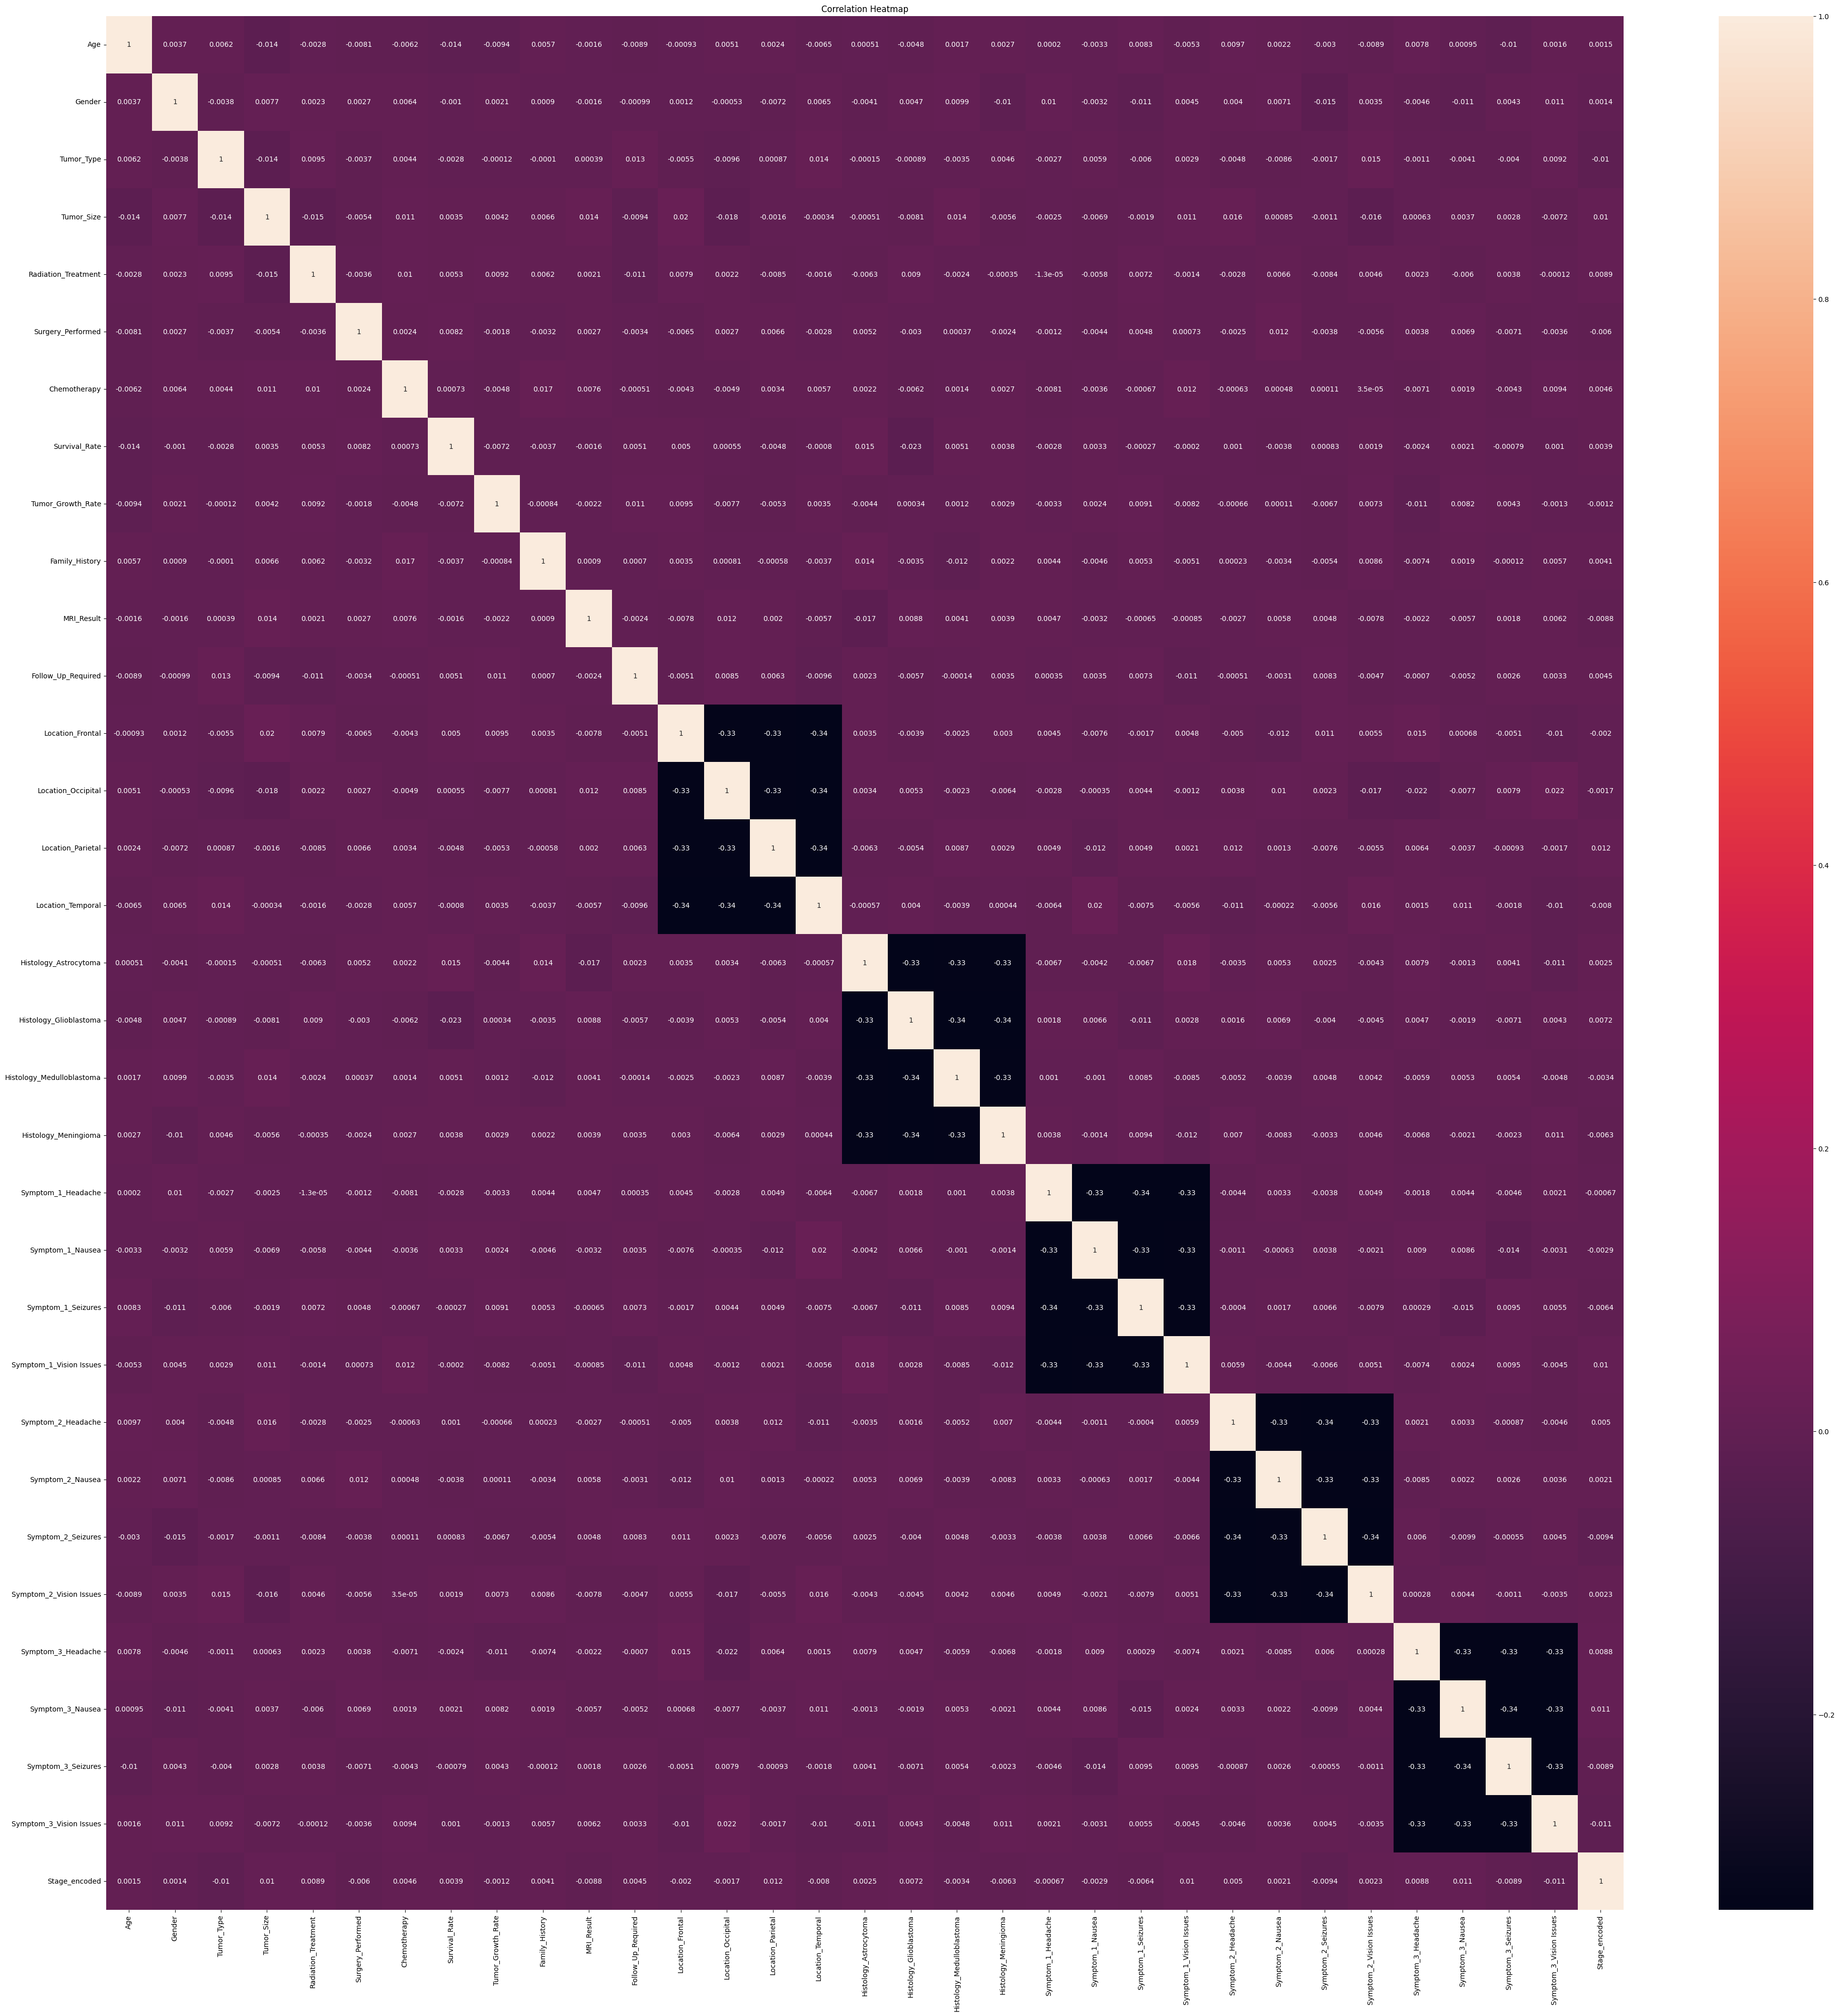

<Figure size 640x480 with 0 Axes>

In [19]:
fig = plt.figure(figsize=(40, 40))
correlation_data = dataM.drop(
    ["Patient_ID"], axis="columns"
).reset_index(drop=True)
dataplot = sns.heatmap(correlation_data.corr(), annot=True)
plt.tight_layout()
plt.title("Correlation Heatmap")
plt.show()
plt.savefig('correlation_matrix.png', dpi=300)

The correlation matrix shows that most features have weak linear relationships with each other, as indicated by correlation values close to 0 or mildly negative (e.g., around -0.3). This suggests a low level of multicollinearity, which is beneficial for many machine learning models. However, the lack of strong correlations may also indicate that linear models might not capture the full complexity of the data, and that non-linear models could potentially perform better.

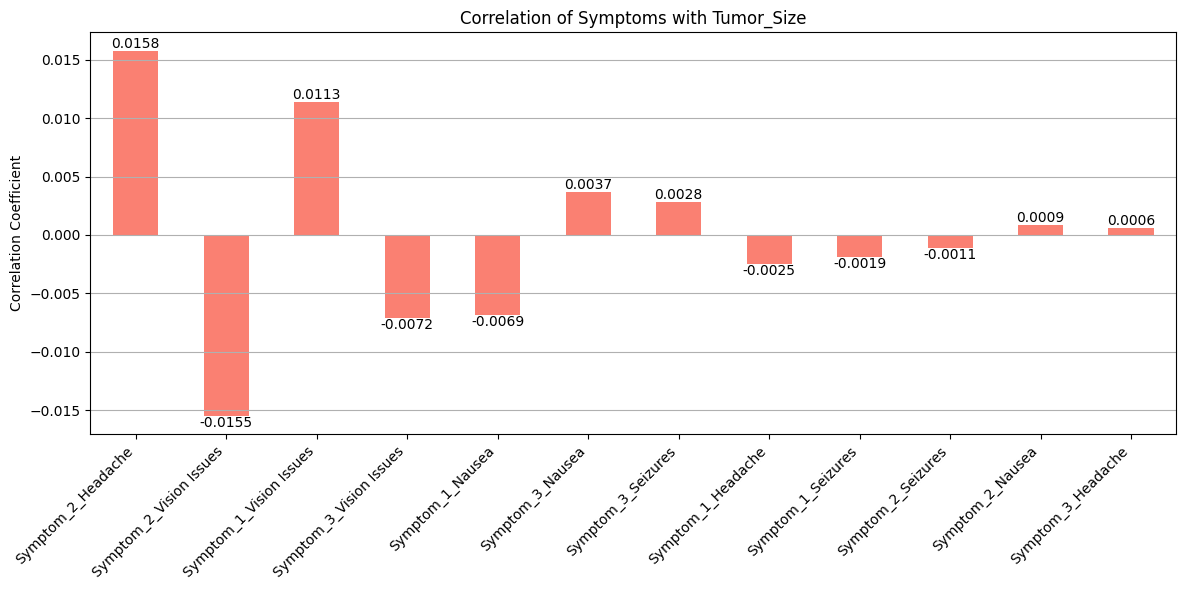

In [20]:
symptom_columns = [col for col in dataM.columns if 'Symptom' in col]

correlations = dataM[symptom_columns + ['Tumor_Size']].corr()['Tumor_Size'].drop('Tumor_Size')
correlations_sorted = correlations.reindex(correlations.abs().sort_values(ascending=False).index)


plt.figure(figsize=(12, 6))
bar = correlations_sorted.plot(kind='bar', color='salmon')
plt.title("Correlation of Symptoms with Tumor_Size")
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y')

for i, v in enumerate(correlations_sorted):
    bar.text(i, v, f"{v:.4f}", ha='center', va='bottom' if v >= 0 else 'top')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

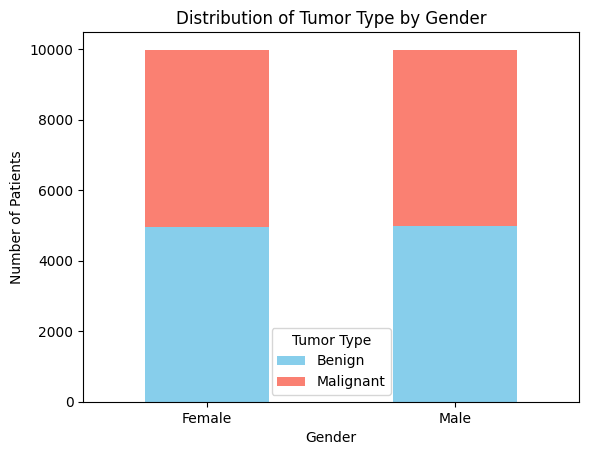

In [21]:
cross_tab = pd.crosstab(dataM['Gender'], dataM['Tumor_Type'])

cross_tab.index = ['Female', 'Male']
cross_tab.columns = ['Benign', 'Malignant']

cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

plt.title('Distribution of Tumor Type by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(title='Tumor Type')
plt.xticks(rotation=0)
plt.show()


C:\Users\teodo\AppData\Local\Temp\ipykernel_17444\1293597427.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette='viridis')


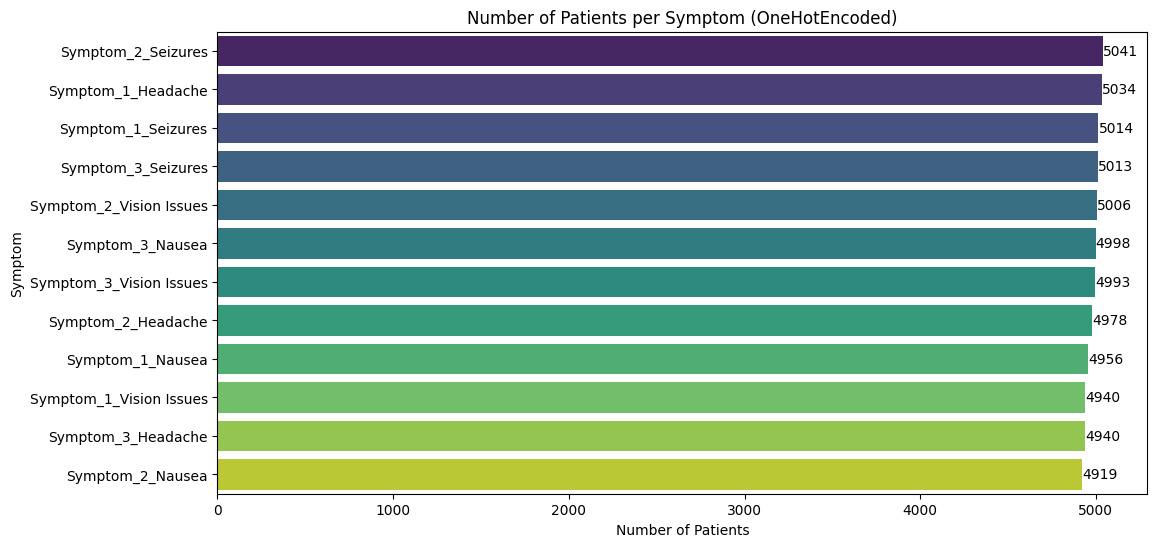

In [22]:
#COUNT PLOT
symptom_columns = [col for col in dataM.columns if col.startswith('Symptom_')]


symptom_counts = dataM[symptom_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index, palette='viridis')

plt.title('Number of Patients per Symptom (OneHotEncoded)')
plt.xlabel('Number of Patients')
plt.ylabel('Symptom')


for i, v in enumerate(symptom_counts.values):
    plt.text(v + 1, i, str(int(v)), color='black', va='center')

plt.show()

C:\Users\teodo\AppData\Local\Temp\ipykernel_17444\2682573767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Stage_encoded', y='Tumor_Size', data=dataM, palette='Set2')


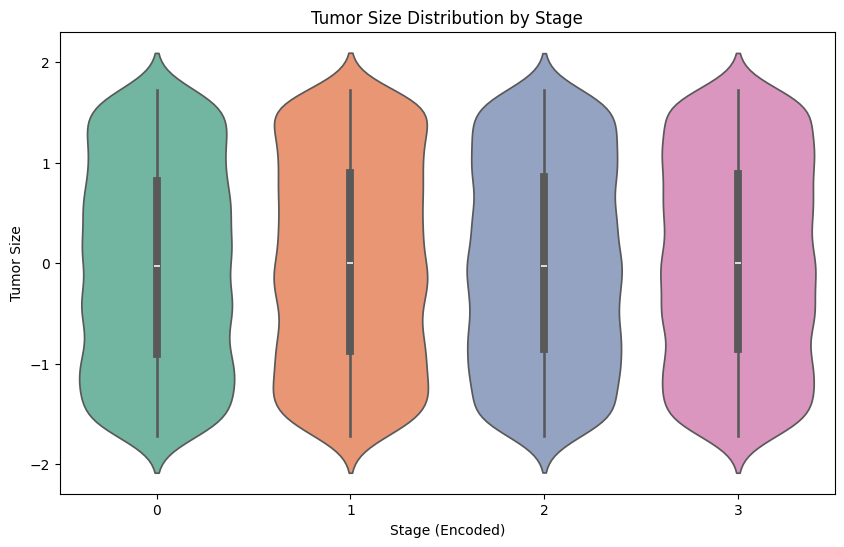

In [23]:
#VIOLIN PLOT
plt.figure(figsize=(10,6))
sns.violinplot(x='Stage_encoded', y='Tumor_Size', data=dataM, palette='Set2')

plt.title('Tumor Size Distribution by Stage')
plt.xlabel('Stage (Encoded)')
plt.ylabel('Tumor Size')

plt.show()

C:\Users\teodo\AppData\Local\Temp\ipykernel_17444\2356796930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='MRI_Result', y='Tumor_Size', data=dataM, palette='Set2')


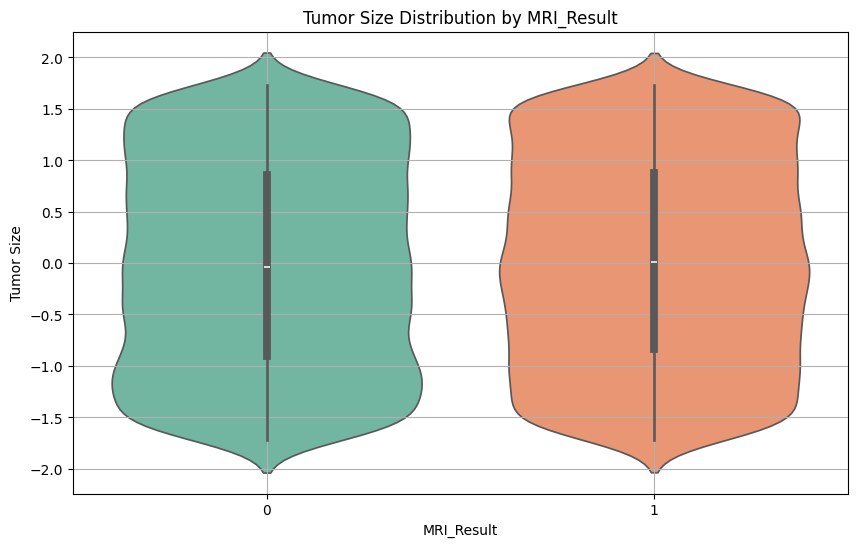

In [24]:
#VIOLIN PLOT
plt.figure(figsize=(10,6))

sns.violinplot(x='MRI_Result', y='Tumor_Size', data=dataM, palette='Set2')

plt.title('Tumor Size Distribution by MRI_Result')
plt.xlabel('MRI_Result')
plt.ylabel('Tumor Size')
plt.grid()
plt.show()

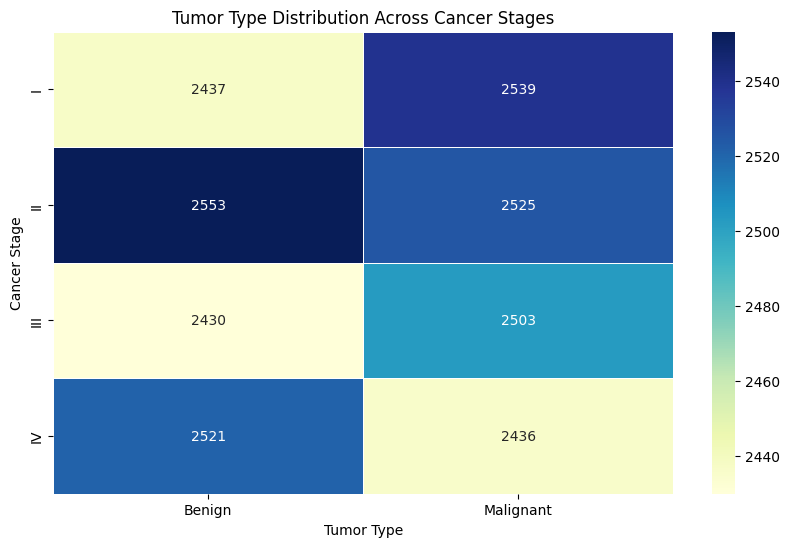

In [25]:
plt.figure(figsize=(10, 6))
tumor_stage_pivot = data1.pivot_table(index="Stage", columns="Tumor_Type", aggfunc="size", fill_value=0)
sns.heatmap(tumor_stage_pivot, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
plt.title("Tumor Type Distribution Across Cancer Stages")
plt.xlabel("Tumor Type")
plt.ylabel("Cancer Stage")
#plt.legend(title="Tumor Type", loc="upper right", labels=["Benign = 0", "Malignant = 1"])
plt.show()

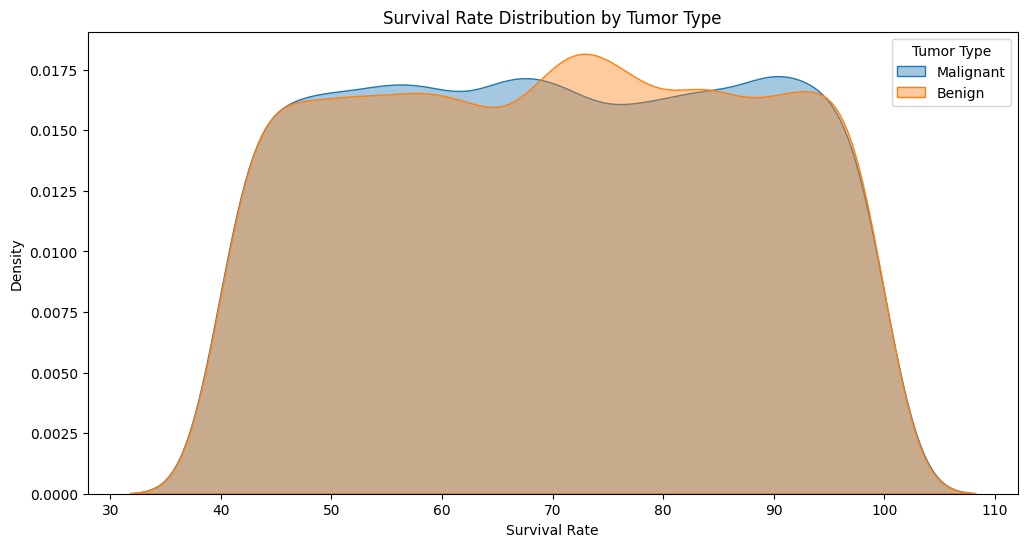

In [26]:
plt.figure(figsize=(12, 6))
for tumor in data1["Tumor_Type"].unique():
    subset = data1[data1["Tumor_Type"] == tumor]
    sns.kdeplot(subset["Survival_Rate"], label=tumor, fill=True, alpha=0.4)

plt.title("Survival Rate Distribution by Tumor Type")
plt.xlabel("Survival Rate")
plt.ylabel("Density")
plt.legend(title="Tumor Type")
plt.show()

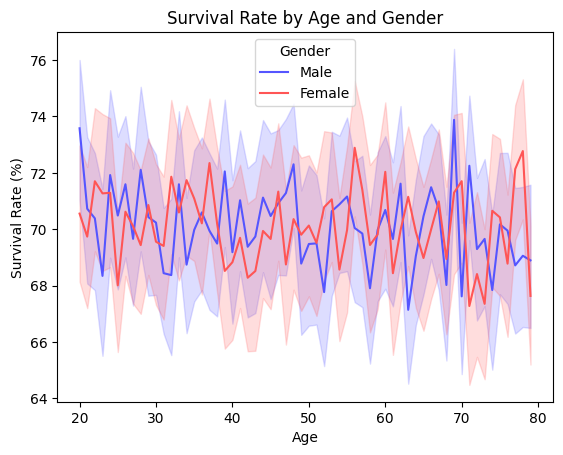

In [27]:
sns.lineplot(x='Age', y='Survival_Rate', hue='Gender', data=data1, palette='seismic')
plt.title('Survival Rate by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Survival Rate (%)')
plt.legend(title='Gender')
plt.show()


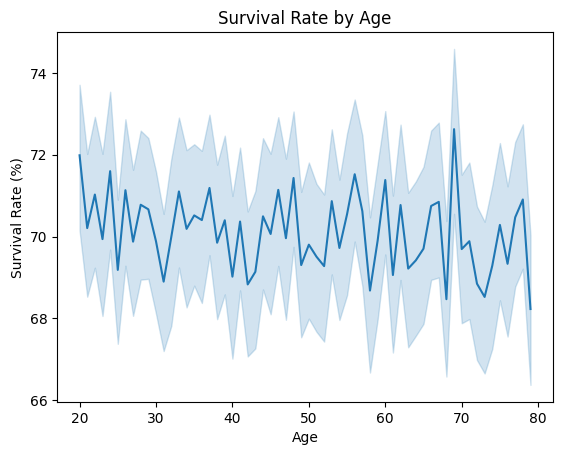

In [28]:
sns.lineplot(x='Age', y='Survival_Rate',  data=data1)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate (%)')
plt.show()


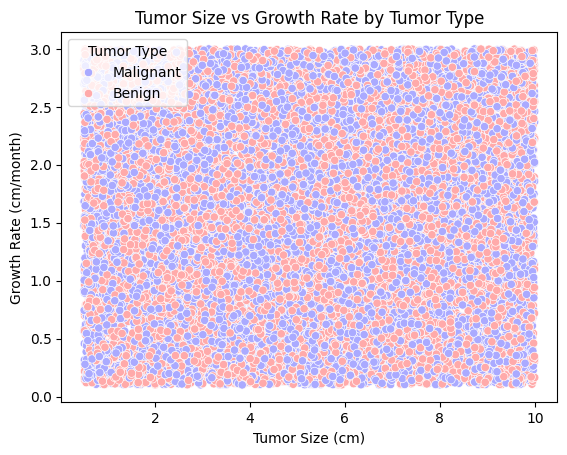

In [29]:
sns.scatterplot(x='Tumor_Size', y='Tumor_Growth_Rate', hue='Tumor_Type', data=data1, palette='bwr')
plt.title('Tumor Size vs Growth Rate by Tumor Type')
plt.xlabel('Tumor Size (cm)')
plt.ylabel('Growth Rate (cm/month)')
plt.legend(title='Tumor Type')
plt.show()


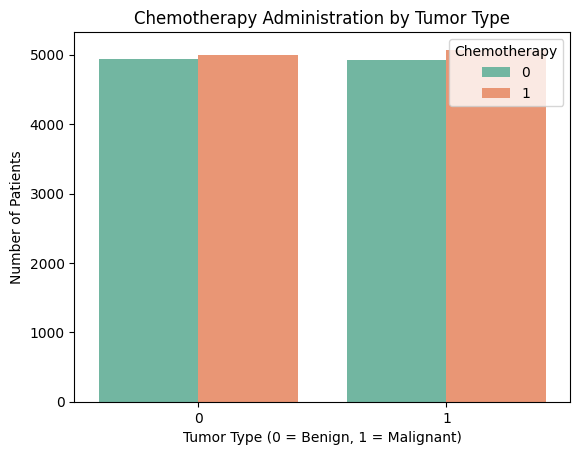

In [30]:
sns.countplot(x='Tumor_Type', hue='Chemotherapy', data=dataM, palette='Set2')
plt.title('Chemotherapy Administration by Tumor Type')
plt.xlabel('Tumor Type (0 = Benign, 1 = Malignant)')
plt.ylabel('Number of Patients')
plt.legend(title='Chemotherapy')
plt.show()

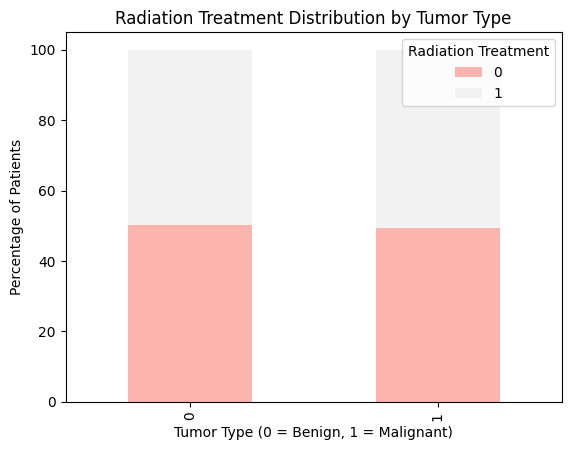

In [31]:
radiation_percent = dataM.groupby('Tumor_Type')['Radiation_Treatment'].value_counts(normalize=True).unstack() * 100

radiation_percent.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Radiation Treatment Distribution by Tumor Type')
plt.xlabel('Tumor Type (0 = Benign, 1 = Malignant)')
plt.ylabel('Percentage of Patients')
plt.legend(title='Radiation Treatment')
plt.show()


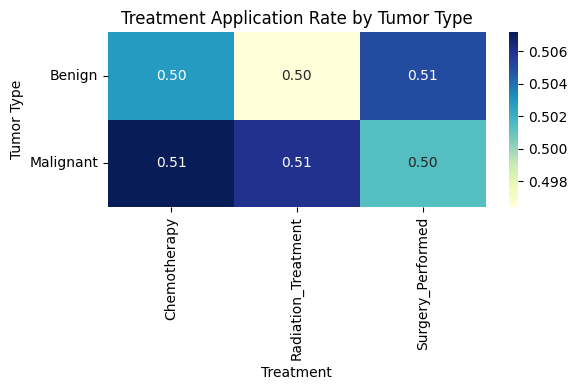

In [32]:
heat_data = dataM.groupby('Tumor_Type')[['Chemotherapy', 'Radiation_Treatment', 'Surgery_Performed']].mean()

plt.figure(figsize=(6, 4))
sns.heatmap(heat_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Treatment Application Rate by Tumor Type")
plt.xlabel("Treatment")
plt.ylabel("Tumor Type")
plt.yticks([0.5, 1.5], ['Benign', 'Malignant'], rotation=0)
plt.tight_layout()
plt.show()


## 3. EDA - Feature engineering
<hr>

We created two new features to enhance the predictive power of our dataset by combining existing attributes that are medically and logically related:

1. Risk_Score

In [33]:
dataM['Risk_Score'] = (
    dataM['Tumor_Size'] * 
    dataM['Tumor_Growth_Rate'] * 
    (dataM['Stage_encoded'] + 1) * 
    (dataM['Tumor_Type'] + 1)
)


2. Generic_Risk <br>


In [34]:
dataM['Genetic_Risk'] = dataM['Family_History'] * dataM['Tumor_Type']
dataM.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,...,Symptom_2_Nausea,Symptom_2_Seizures,Symptom_2_Vision Issues,Symptom_3_Headache,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues,Stage_encoded,Risk_Score,Genetic_Risk
0,1,1.354944,1,1,0.050245,0,0,0,-1.088750,-1.718319,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,-0.518018,0
1,2,-1.348155,1,0,-0.141591,1,1,1,-1.374719,0.738733,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,-0.209196,0
2,3,-1.060592,1,0,0.127477,0,0,0,-1.334252,0.401962,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.051241,0
3,4,-1.175617,1,1,-1.379505,1,0,1,-1.057425,-0.316883,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3,3.497138,1
4,5,0.262201,0,0,-1.023464,0,0,1,-0.892109,0.623578,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-0.638210,0


Meaning that the risk would be high (=1) if the tumor is malignant and there is a family history of tumors.

C:\Users\teodo\AppData\Local\Temp\ipykernel_17444\3753929301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Tumor_Type', y='Risk_Score', data=dataM, palette='Set3')


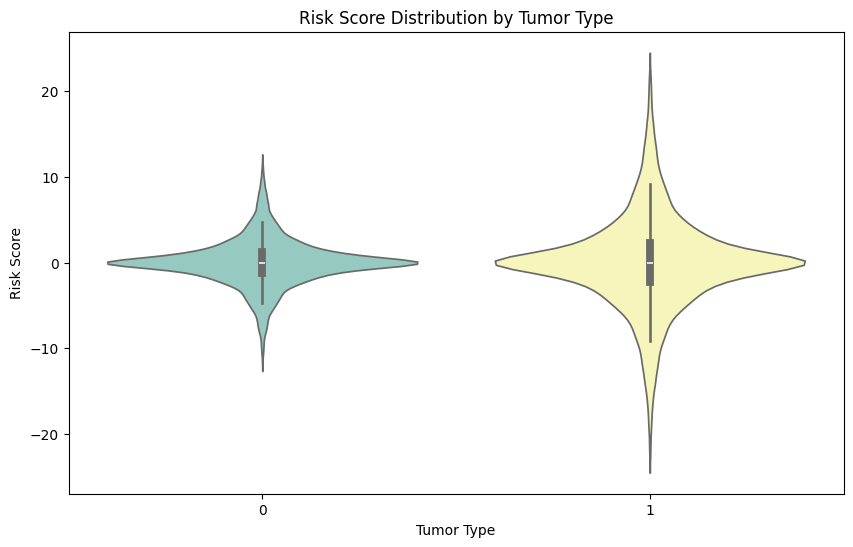

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Tumor_Type', y='Risk_Score', data=dataM, palette='Set3')
plt.title('Risk Score Distribution by Tumor Type')
plt.xlabel('Tumor Type')
plt.ylabel('Risk Score')
plt.show()

C:\Users\teodo\AppData\Local\Temp\ipykernel_17444\4248023448.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Tumor_Type', y='Risk_Score', data=dataM, jitter=True, palette='GnBu', alpha=0.6)


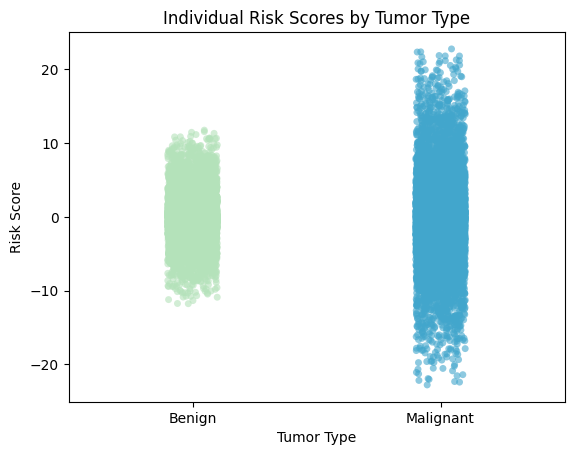

In [36]:
sns.stripplot(x='Tumor_Type', y='Risk_Score', data=dataM, jitter=True, palette='GnBu', alpha=0.6)
plt.title('Individual Risk Scores by Tumor Type')
plt.xlabel('Tumor Type')
plt.ylabel('Risk Score')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()


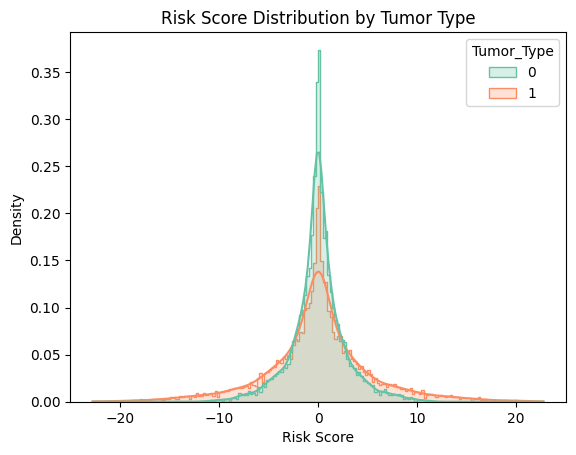

In [37]:
sns.histplot(data=dataM, x='Risk_Score', hue='Tumor_Type', kde=True, palette='Set2', element='step', stat='density', common_norm=False)
plt.title('Risk Score Distribution by Tumor Type')
plt.xlabel('Risk Score')
plt.ylabel('Density')
plt.show()


In [38]:
dataM.shape


(19944, 36)

<br>

## 4. Data Split 
<hr>

Separation of the features. "X" would be the feature vectors and "y" would be the class. Our target class is "Tumor_Type".

In [39]:
y = dataM['Tumor_Type']
X = dataM.drop(['Tumor_Type', 'Patient_ID'], axis=1)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (19944, 34)
y shape: (19944,)


Random split 70-30

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (13960, 34)
Test set: (5984, 34)


## 5. Train models - Random Split
<hr>

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [42]:
dtree = DecisionTreeClassifier(random_state=1, max_depth=10)
rf = RandomForestClassifier(random_state=1, n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf')
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
gnb = GaussianNB()

classifiers = {
    "Decision Tree": dtree,
    "Random Forest": rf,
    "KNN": knn,
    "SVM": svm,
    "XGBoost": xgb,
    "Naive Bayes": gnb
}

#train models
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    print(f"{name} model trained.")

accuracies = {}

#predict
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    accuracies[name] = accuracy
    print(f"{name} model accuracy: {accuracy:.2f}")

comparison_acc = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
comparison_acc

Decision Tree model trained.
Random Forest model trained.
KNN model trained.
SVM model trained.


c:\Users\teodo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:00:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained.
Naive Bayes model trained.
Decision Tree model accuracy: 0.85
Random Forest model accuracy: 0.81
KNN model accuracy: 0.71
SVM model accuracy: 0.86
XGBoost model accuracy: 0.97
Naive Bayes model accuracy: 0.75


,Model,Accuracy
0,Decision Tree,0.847426
1,Random Forest,0.814672
2,KNN,0.710896
3,SVM,0.856785
4,XGBoost,0.970421
5,Naive Bayes,0.753509



===== Decision Tree =====
Confusion Matrix:
[[2781  202]
 [ 711 2290]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2983
           1       0.92      0.76      0.83      3001

    accuracy                           0.85      5984
   macro avg       0.86      0.85      0.85      5984
weighted avg       0.86      0.85      0.85      5984



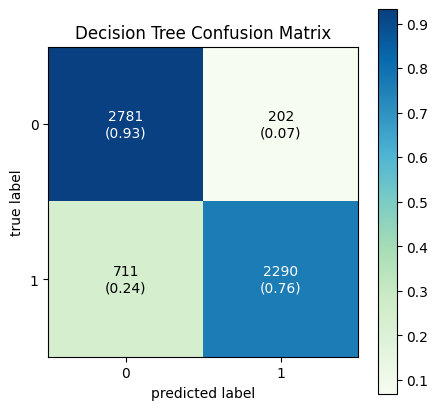


===== Random Forest =====
Confusion Matrix:
[[2734  249]
 [ 860 2141]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      2983
           1       0.90      0.71      0.79      3001

    accuracy                           0.81      5984
   macro avg       0.83      0.81      0.81      5984
weighted avg       0.83      0.81      0.81      5984



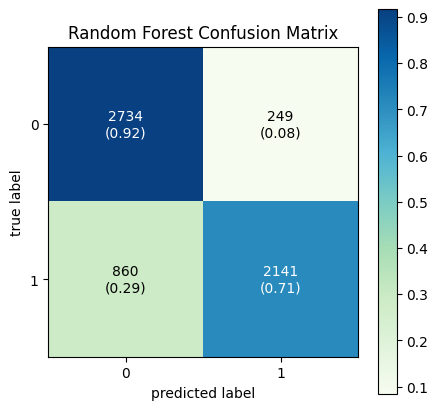


===== KNN =====
Confusion Matrix:
[[2317  666]
 [1064 1937]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.73      2983
           1       0.74      0.65      0.69      3001

    accuracy                           0.71      5984
   macro avg       0.71      0.71      0.71      5984
weighted avg       0.71      0.71      0.71      5984



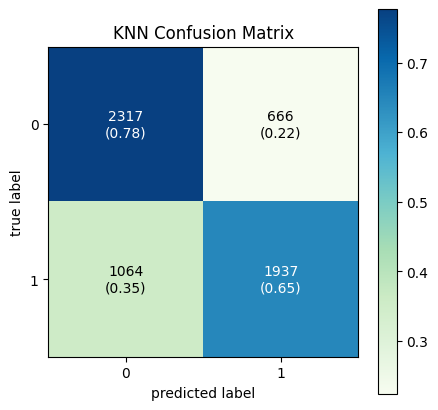


===== SVM =====
Confusion Matrix:
[[2967   16]
 [ 841 2160]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2983
           1       0.99      0.72      0.83      3001

    accuracy                           0.86      5984
   macro avg       0.89      0.86      0.85      5984
weighted avg       0.89      0.86      0.85      5984



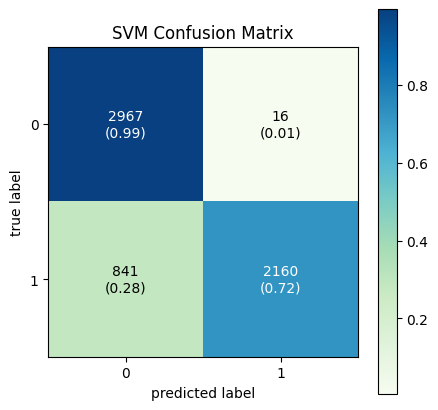


===== XGBoost =====


c:\Users\teodo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:01:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[2919   64]
 [ 113 2888]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2983
           1       0.98      0.96      0.97      3001

    accuracy                           0.97      5984
   macro avg       0.97      0.97      0.97      5984
weighted avg       0.97      0.97      0.97      5984



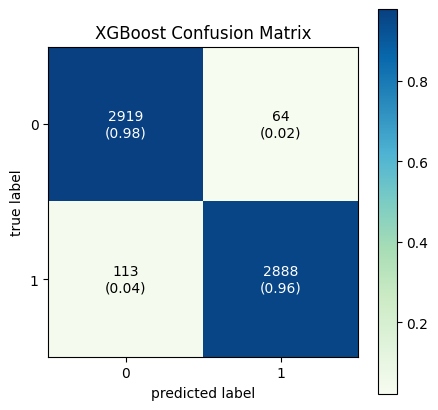


===== Naive Bayes =====
Confusion Matrix:
[[2983    0]
 [1475 1526]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      2983
           1       1.00      0.51      0.67      3001

    accuracy                           0.75      5984
   macro avg       0.83      0.75      0.74      5984
weighted avg       0.84      0.75      0.74      5984



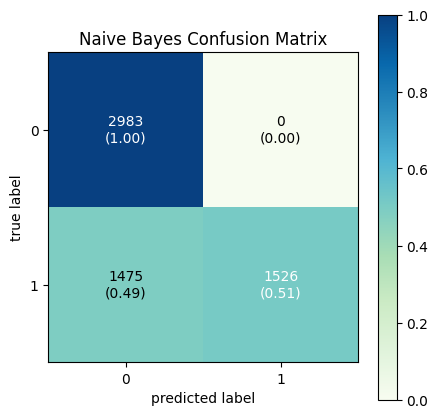

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

def plot_cm(y_true, y_pred, title = "",cmap="GnBu", figsize=(5, 5)):
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(
        conf_mat=cm,
        show_absolute=True,
        show_normed=True,
        colorbar=True,
        cmap=cmap,
        figsize=figsize,
    )
    plt.title(title)
    plt.show()

for name, model in classifiers.items():
    print(f"\n===== {name} =====")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plot_cm(y_test, y_pred, title = name + " Confusion Matrix")
    

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

final_results = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    final_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })


finalTable = pd.DataFrame(final_results)
finalTable


c:\Users\teodo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:01:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.847426,0.918941,0.763079,0.833788
1,Random Forest,0.814672,0.895816,0.713429,0.794287
2,KNN,0.710896,0.744141,0.645452,0.691292
3,SVM,0.856785,0.992647,0.719760,0.834460
4,XGBoost,0.970421,0.978320,0.962346,0.970267
5,Naive Bayes,0.753509,1.000000,0.508497,0.674177


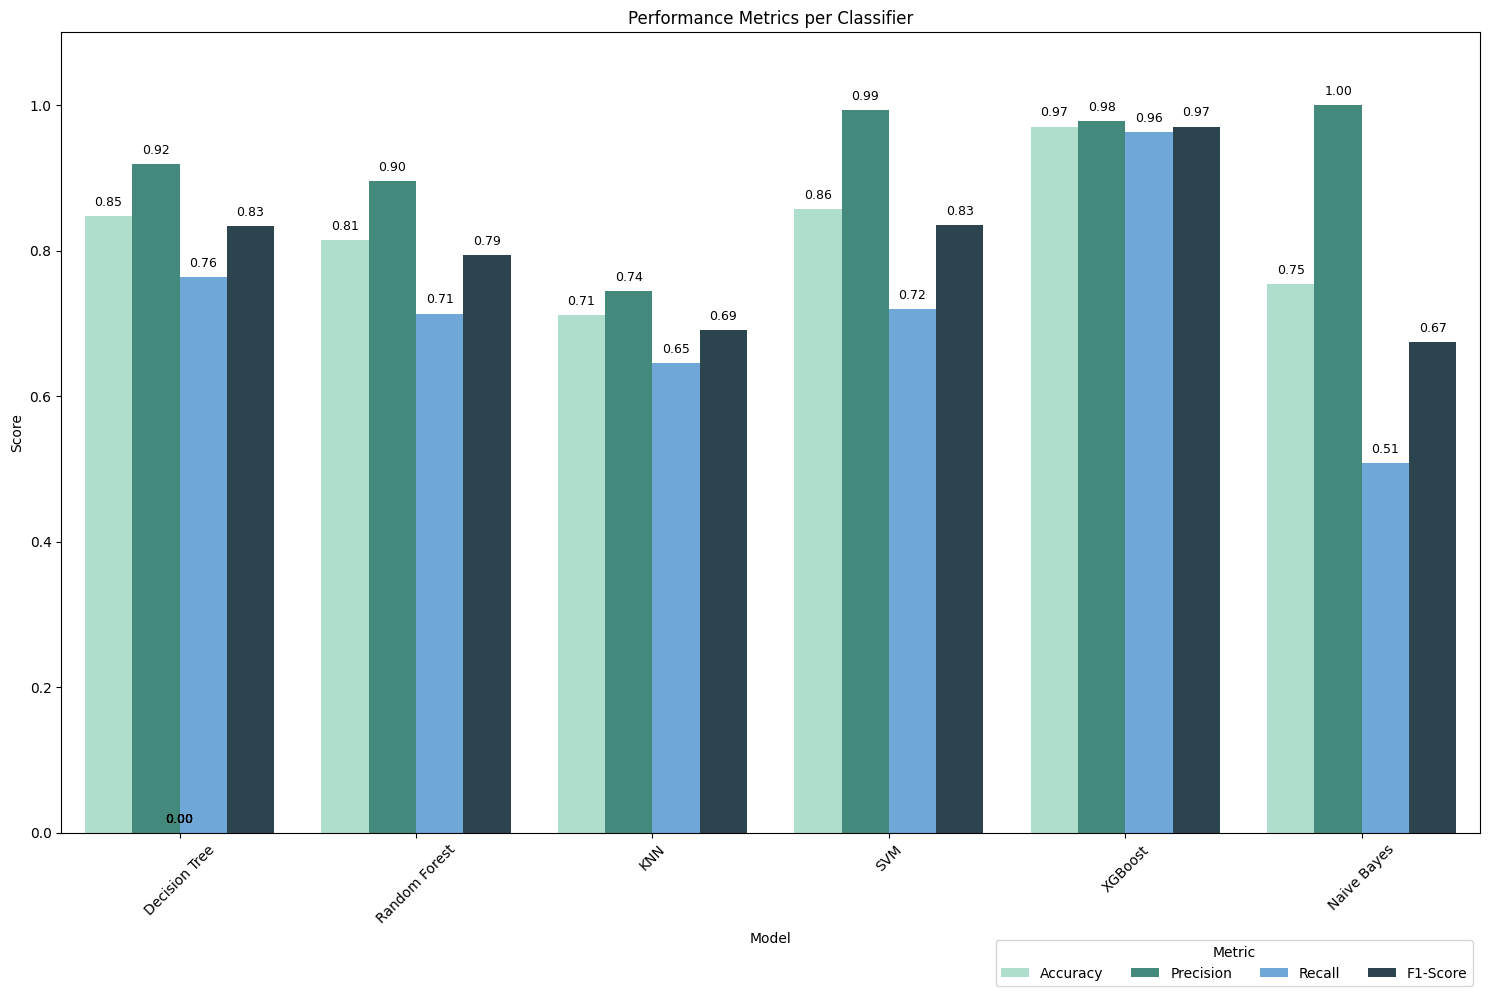

In [45]:
#HISTOGRAM
dataHistogram = finalTable.melt(id_vars="Model", var_name="Metric", value_name="Score")
custom_palette = [
    "#A8E6CF",  
    "#379683",  
    "#5DA9E9",  
    "#264653"   
]

plt.figure(figsize=(15, 10))
ax = sns.barplot(data=dataHistogram, x="Model", y="Score", hue="Metric", palette=custom_palette)
#sns.barplot(data = dataHistogram, x="Model", y="Score", hue="Metric", palette = custom_palette)
plt.title("Performance Metrics per Classifier")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.legend(title="Metric", loc="lower right", bbox_to_anchor=(1, -0.2), ncol=4)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,     
        height + 0.01,                     
        f'{height:.2f}',                   
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()


## 6. Data Split - K fold Cross Validation
<hr>


===== Decision Tree =====
 Fold 1: Accuracy=0.85 | F1=0.85
 Fold 2: Accuracy=0.85 | F1=0.85
 Fold 3: Accuracy=0.84 | F1=0.84
 Fold 4: Accuracy=0.84 | F1=0.83
 Fold 5: Accuracy=0.85 | F1=0.85
 Fold 6: Accuracy=0.86 | F1=0.86
 Fold 7: Accuracy=0.85 | F1=0.85
 Fold 8: Accuracy=0.86 | F1=0.86
 Fold 9: Accuracy=0.85 | F1=0.85
 Fold 10: Accuracy=0.84 | F1=0.84

Decision Tree - Average accuracy: 0.847924952803272

Aggregated Confusion Matrix:
[[9102  839]
 [2194 7809]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      9941
           1       0.90      0.78      0.84     10003

    accuracy                           0.85     19944
   macro avg       0.85      0.85      0.85     19944
weighted avg       0.85      0.85      0.85     19944



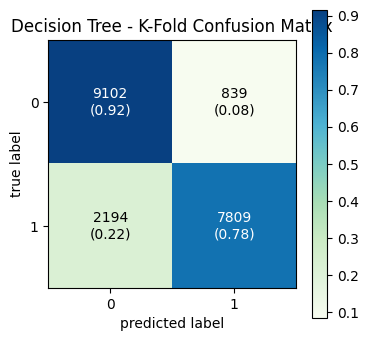


===== Random Forest =====
 Fold 1: Accuracy=0.83 | F1=0.83
 Fold 2: Accuracy=0.82 | F1=0.82
 Fold 3: Accuracy=0.83 | F1=0.82
 Fold 4: Accuracy=0.82 | F1=0.82
 Fold 5: Accuracy=0.83 | F1=0.83
 Fold 6: Accuracy=0.81 | F1=0.81
 Fold 7: Accuracy=0.83 | F1=0.83
 Fold 8: Accuracy=0.83 | F1=0.83
 Fold 9: Accuracy=0.80 | F1=0.80
 Fold 10: Accuracy=0.81 | F1=0.81

Random Forest - Average accuracy: 0.8211484327669727

Aggregated Confusion Matrix:
[[9194  747]
 [2820 7183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      9941
           1       0.91      0.72      0.80     10003

    accuracy                           0.82     19944
   macro avg       0.84      0.82      0.82     19944
weighted avg       0.84      0.82      0.82     19944



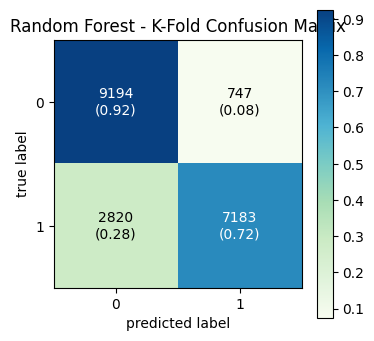


===== KNN =====
 Fold 1: Accuracy=0.71 | F1=0.71
 Fold 2: Accuracy=0.70 | F1=0.70
 Fold 3: Accuracy=0.72 | F1=0.72
 Fold 4: Accuracy=0.73 | F1=0.73
 Fold 5: Accuracy=0.72 | F1=0.72
 Fold 6: Accuracy=0.71 | F1=0.71
 Fold 7: Accuracy=0.72 | F1=0.72
 Fold 8: Accuracy=0.71 | F1=0.71
 Fold 9: Accuracy=0.69 | F1=0.69
 Fold 10: Accuracy=0.71 | F1=0.70

KNN - Average accuracy: 0.7120932722980974

Aggregated Confusion Matrix:
[[7697 2244]
 [3498 6505]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      9941
           1       0.74      0.65      0.69     10003

    accuracy                           0.71     19944
   macro avg       0.72      0.71      0.71     19944
weighted avg       0.72      0.71      0.71     19944



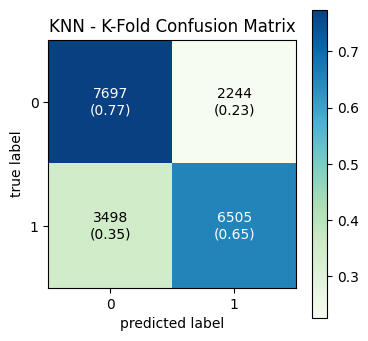


===== SVM =====
 Fold 1: Accuracy=0.87 | F1=0.87
 Fold 2: Accuracy=0.86 | F1=0.85
 Fold 3: Accuracy=0.87 | F1=0.87
 Fold 4: Accuracy=0.86 | F1=0.86
 Fold 5: Accuracy=0.87 | F1=0.86
 Fold 6: Accuracy=0.86 | F1=0.86
 Fold 7: Accuracy=0.88 | F1=0.88
 Fold 8: Accuracy=0.87 | F1=0.86
 Fold 9: Accuracy=0.86 | F1=0.86
 Fold 10: Accuracy=0.86 | F1=0.85

SVM - Average accuracy: 0.864721357053617

Aggregated Confusion Matrix:
[[9911   30]
 [2668 7335]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9941
           1       1.00      0.73      0.84     10003

    accuracy                           0.86     19944
   macro avg       0.89      0.87      0.86     19944
weighted avg       0.89      0.86      0.86     19944



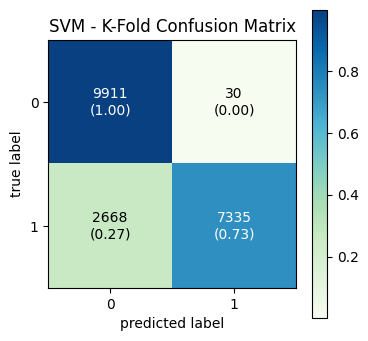


===== XGBoost =====
 Fold 1: Accuracy=0.98 | F1=0.98
 Fold 2: Accuracy=0.97 | F1=0.97
 Fold 3: Accuracy=0.97 | F1=0.97
 Fold 4: Accuracy=0.97 | F1=0.97
 Fold 5: Accuracy=0.97 | F1=0.97
 Fold 6: Accuracy=0.97 | F1=0.97
 Fold 7: Accuracy=0.98 | F1=0.98
 Fold 8: Accuracy=0.98 | F1=0.98
 Fold 9: Accuracy=0.97 | F1=0.97
 Fold 10: Accuracy=0.97 | F1=0.97

XGBoost - Average accuracy: 0.9709687206984363

Aggregated Confusion Matrix:
[[9741  200]
 [ 379 9624]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9941
           1       0.98      0.96      0.97     10003

    accuracy                           0.97     19944
   macro avg       0.97      0.97      0.97     19944
weighted avg       0.97      0.97      0.97     19944



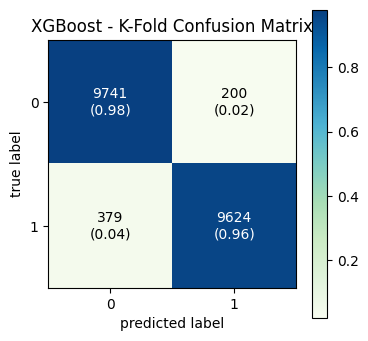


===== Naive Bayes =====
 Fold 1: Accuracy=0.76 | F1=0.75
 Fold 2: Accuracy=0.75 | F1=0.74
 Fold 3: Accuracy=0.76 | F1=0.75
 Fold 4: Accuracy=0.75 | F1=0.74
 Fold 5: Accuracy=0.77 | F1=0.76
 Fold 6: Accuracy=0.75 | F1=0.73
 Fold 7: Accuracy=0.76 | F1=0.75
 Fold 8: Accuracy=0.75 | F1=0.74
 Fold 9: Accuracy=0.76 | F1=0.74
 Fold 10: Accuracy=0.76 | F1=0.74

Naive Bayes - Average accuracy: 0.7574209344826459

Aggregated Confusion Matrix:
[[9941    0]
 [4838 5165]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      9941
           1       1.00      0.52      0.68     10003

    accuracy                           0.76     19944
   macro avg       0.84      0.76      0.74     19944
weighted avg       0.84      0.76      0.74     19944



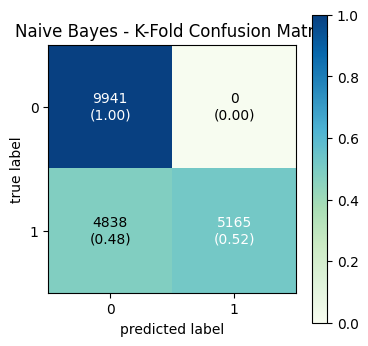

In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#all other imports are already imported above

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results_CV = []

for name, model in classifiers.items():
    print(f"\n===== {name} =====")

    accuracies, precisions, recalls, f1s = [], [], [], []
    all_y_true = []
    all_y_pred = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
        X_train_fold = X.iloc[train_idx]
        X_test_fold = X.iloc[test_idx]
        y_train_fold = y.iloc[train_idx]
        y_test_fold = y.iloc[test_idx]

        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)

        acc = accuracy_score(y_test_fold, y_pred_fold)
        prec = precision_score(y_test_fold, y_pred_fold, average='weighted', zero_division=0)
        rec = recall_score(y_test_fold, y_pred_fold, average='macro')
        f1 = f1_score(y_test_fold, y_pred_fold, average='macro')

        accuracies.append(acc)
        precisions.append(prec)
        recalls.append(rec)
        f1s.append(f1)

        all_y_true.extend(y_test_fold)
        all_y_pred.extend(y_pred_fold)

        print(f" Fold {fold}: Accuracy={acc:.2f} | F1={f1:.2f}")

    results_CV.append({
        "Model": name,
        "Accuracy": np.mean(accuracies),
        "Precision": np.mean(precisions),
        "Recall": np.mean(recalls),
        "F1-Score": np.mean(f1s)
    })

    print(f"\n{name} - Average accuracy:", np.mean(accuracies))

    print("\nAggregated Confusion Matrix:")
    print(confusion_matrix(all_y_true, all_y_pred))

    print("\nClassification Report:")
    print(classification_report(all_y_true, all_y_pred))

    plot_cm(all_y_true, all_y_pred, title=f"{name} - K-Fold Confusion Matrix")


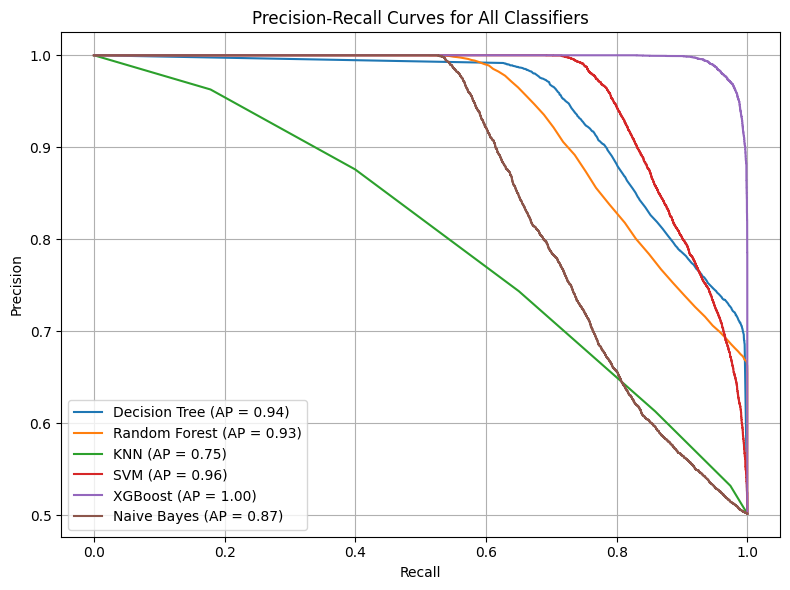

In [76]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for name, model in classifiers.items():
    y_true_all = []
    y_scores_all = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)

        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        else:
            y_scores = model.decision_function(X_test)

        y_scores_all.extend(y_scores)
        y_true_all.extend(y_test)

    precision, recall, _ = precision_recall_curve(y_true_all, y_scores_all)
    avg_prec = average_precision_score(y_true_all, y_scores_all)

    plt.plot(recall, precision, label=f"{name} (AP = {avg_prec:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for All Classifiers")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()


This graph shows the Precision-Recall (PR) curves for six different classifiers on your brain tumor dataset (benign vs. malign). Each curve represents how well a classifier distinguishes between the two classes, especially when dealing with imbalanced data (which is common in medical datasets).

Precision: How many of the predicted malign cases were actually malign?

Recall (Sensitivity): How many of the actual malign cases were correctly predicted?

A higher curve indicates better performance. The Average Precision (AP) summarizes the area under each PR curve — closer to 1 means better.

* XGBoost performed the best with an AP of 1.00, indicating near-perfect precision and recall across all thresholds.

* SVM (0.96) and Decision Tree (0.94) also showed strong performance, with high recall and precision balance.

* Random Forest (0.93) had slightly lower precision than the top two but still performed very well.

* Naive Bayes (0.87) showed decent performance, but with a visible drop in precision at higher recall levels.

* KNN (0.75) had the weakest performance, struggling to maintain high precision as recall increased, suggesting it is less reliable for detecting malign tumors.

In [77]:
finalTableCV = pd.DataFrame(results_CV)
print("\nFinal Cross-Validation Results:\n")
finalTableCV


Final Cross-Validation Results:



,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.847925,0.854894,0.848133,0.847241
1,Random Forest,0.821148,0.835899,0.821468,0.819282
2,KNN,0.712093,0.715652,0.712287,0.711034
3,SVM,0.864721,0.892301,0.865131,0.862400
4,XGBoost,0.970969,0.971151,0.970996,0.970967
5,Naive Bayes,0.757421,0.836856,0.758172,0.742627


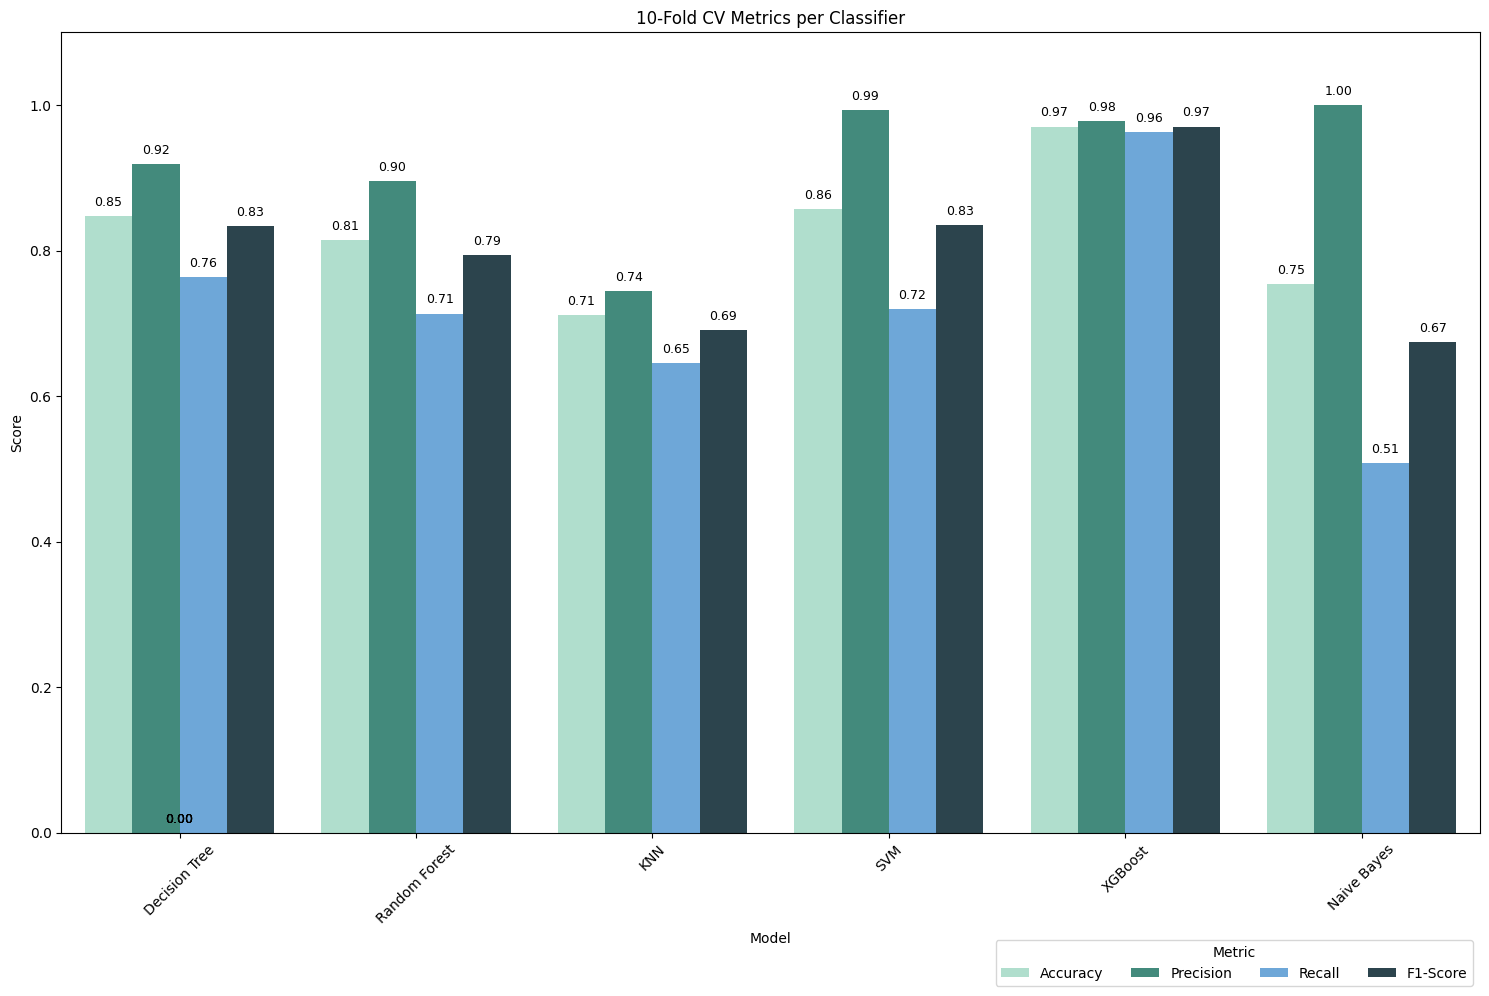

In [49]:
#HISTOGRAM
dataHistogram = finalTable.melt(id_vars="Model", var_name="Metric", value_name="Score")
custom_palette = [
    "#A8E6CF", "#379683", "#5DA9E9", "#264653"
]

plt.figure(figsize=(15, 10))
ax = sns.barplot(data=dataHistogram, x="Model", y="Score", hue="Metric", palette=custom_palette)
#sns.barplot(data=dataHistogram, x="Model", y="Score", hue="Metric", palette=custom_palette)
plt.title("10-Fold CV Metrics per Classifier")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.legend(title="Metric", loc="lower right", bbox_to_anchor=(1, -0.2), ncol=4)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,     
        height + 0.01,                     
        f'{height:.2f}',                   
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()

After performing classification using both random split and k-fold validation, we observe that the results are nearly identical, with only minimal variations up to the third decimal place. However, k-fold validation proves to be the more reliable approach due to its ability to provide a more generalized evaluation. In both cases, XGBoost consistently emerges as the best classifier, demonstrating superior performance and accuracy.


XGBoost achieved the best accuracy among all models we evaluated with a value of 97%. Our dataset was relatively balanced, contained only a small number of missing values, and had a limited number of instances. XGBoost performed well in this setting because it is efficient with small to medium-sized datasets and handles missing values internally. Moreover, its ability to prevent overfitting through regularization made it a suitable choice for our data, leading to the most reliable results.​

## 7. Feature Selection 
<hr>

In this part of the project we will select the most important features of the dataset and perform calssification again.Feature selection improves model accuracy, reduces overfitting, speeds up training, and makes the model easier to interpret by removing irrelevant or redundant data. 

In [50]:
print("Number of features:", dataM.shape)


Number of features: (19944, 36)


In [51]:
from sklearn.feature_selection import SelectKBest, f_classif

num_features = 21  
selector = SelectKBest(score_func=f_classif, k=num_features)
X_train_selected = selector.fit_transform(X_train, y_train)


selected_feature_names = X_train.columns[selector.get_support()]
print("Selected Features:", selected_feature_names)


X_test_selected = selector.transform(X_test)

Selected Features: Index(['Age', 'Tumor_Size', 'Radiation_Treatment', 'Surgery_Performed',
       'Follow_Up_Required', 'Location_Frontal', 'Location_Occipital',
       'Location_Temporal', 'Histology_Medulloblastoma',
       'Histology_Meningioma', 'Symptom_1_Headache', 'Symptom_1_Nausea',
       'Symptom_1_Seizures', 'Symptom_2_Headache', 'Symptom_2_Nausea',
       'Symptom_2_Vision Issues', 'Symptom_3_Headache', 'Symptom_3_Seizures',
       'Symptom_3_Vision Issues', 'Stage_encoded', 'Genetic_Risk'],
      dtype='object')


In [52]:
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'F_score': selector.scores_,
    'p_value': selector.pvalues_
})


selected_feature_scores = feature_scores[feature_scores['Feature'].isin(selected_feature_names)].sort_values(by='F_score', ascending=False)

print(selected_feature_scores)

                      Feature      F_score   p_value
33               Genetic_Risk  8975.862943  0.000000
26    Symptom_2_Vision Issues     5.804154  0.015998
14          Location_Temporal     4.264431  0.038933
2                  Tumor_Size     4.207795  0.040253
10         Follow_Up_Required     3.525954  0.060431
24           Symptom_2_Nausea     2.981137  0.084257
3         Radiation_Treatment     2.593232  0.107339
31              Stage_encoded     1.742542  0.186834
18       Histology_Meningioma     1.585009  0.208057
0                         Age     1.349265  0.245422
12         Location_Occipital     1.220125  0.269351
20           Symptom_1_Nausea     0.967423  0.325337
4           Surgery_Performed     0.782304  0.376449
29         Symptom_3_Seizures     0.742304  0.388935
11           Location_Frontal     0.629262  0.427637
21         Symptom_1_Seizures     0.549289  0.458618
17  Histology_Medulloblastoma     0.524086  0.469113
23         Symptom_2_Headache     0.524086  0.

In [53]:
dtree = DecisionTreeClassifier(random_state=1, max_depth=10)
rf = RandomForestClassifier(random_state=1, n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf')
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
gnb = GaussianNB()

classifiers = {
    "Decision Tree": dtree,
    "Random Forest": rf,
    "KNN": knn,
    "SVM": svm,
    "XGBoost": xgb,
    "Naive Bayes": gnb
}

#train models
for name, clf in classifiers.items():
    clf.fit(X_train_selected, y_train)
    print(f"{name} model trained.")

accuracies = {}

#predict
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test_selected)
    accuracy = clf.score(X_test_selected, y_test)
    accuracies[name] = accuracy
    print(f"{name} model accuracy: {accuracy:.2f}")

comparison = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
comparison

Decision Tree model trained.
Random Forest model trained.
KNN model trained.
SVM model trained.
XGBoost model trained.
Naive Bayes model trained.
Decision Tree model accuracy: 0.74
Random Forest model accuracy: 0.73
KNN model accuracy: 0.68
SVM model accuracy: 0.75
XGBoost model accuracy: 0.72
Naive Bayes model accuracy: 0.75


,Model,Accuracy
0,Decision Tree,0.739218
1,Random Forest,0.730191
2,KNN,0.678034
3,SVM,0.745236
4,XGBoost,0.716650
5,Naive Bayes,0.745236



===== Decision Tree =====
Confusion Matrix:
[[954  40]
 [480 520]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       994
           1       0.93      0.52      0.67      1000

    accuracy                           0.74      1994
   macro avg       0.80      0.74      0.73      1994
weighted avg       0.80      0.74      0.73      1994



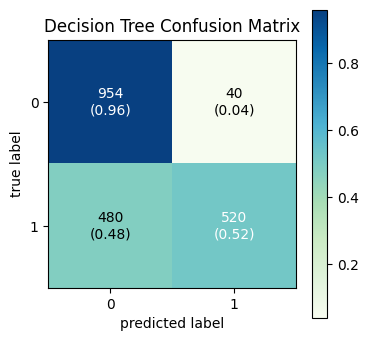


===== Random Forest =====
Confusion Matrix:
[[930  64]
 [474 526]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.94      0.78       994
           1       0.89      0.53      0.66      1000

    accuracy                           0.73      1994
   macro avg       0.78      0.73      0.72      1994
weighted avg       0.78      0.73      0.72      1994



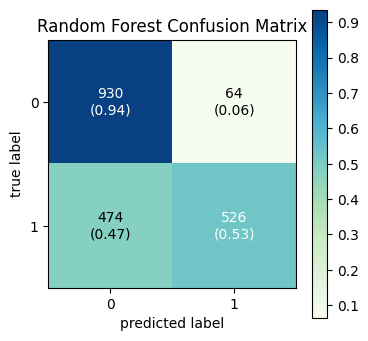


===== KNN =====
Confusion Matrix:
[[769 225]
 [417 583]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       994
           1       0.72      0.58      0.64      1000

    accuracy                           0.68      1994
   macro avg       0.68      0.68      0.68      1994
weighted avg       0.69      0.68      0.68      1994



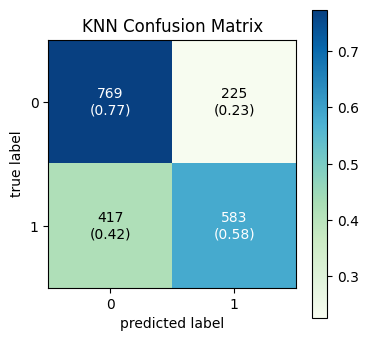


===== SVM =====
Confusion Matrix:
[[994   0]
 [508 492]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       994
           1       1.00      0.49      0.66      1000

    accuracy                           0.75      1994
   macro avg       0.83      0.75      0.73      1994
weighted avg       0.83      0.75      0.73      1994



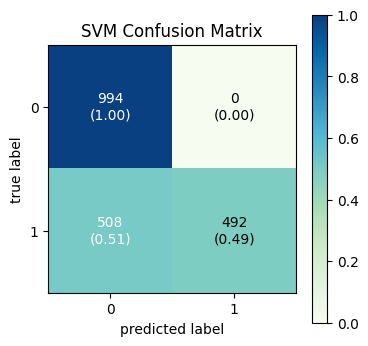


===== XGBoost =====
Confusion Matrix:
[[871 123]
 [442 558]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.88      0.76       994
           1       0.82      0.56      0.66      1000

    accuracy                           0.72      1994
   macro avg       0.74      0.72      0.71      1994
weighted avg       0.74      0.72      0.71      1994



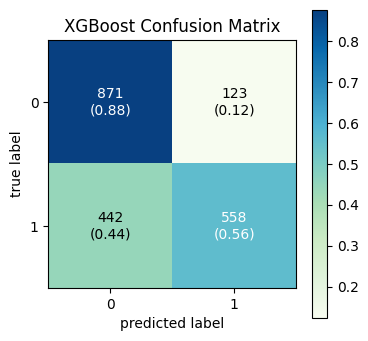


===== Naive Bayes =====
Confusion Matrix:
[[994   0]
 [508 492]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       994
           1       1.00      0.49      0.66      1000

    accuracy                           0.75      1994
   macro avg       0.83      0.75      0.73      1994
weighted avg       0.83      0.75      0.73      1994



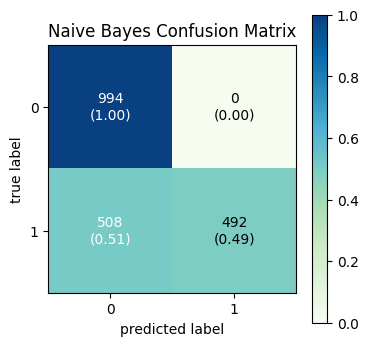

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


def plot_cm(y_true, y_pred, title="",cmap="GnBu", figsize=(4, 4)):
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(
        conf_mat=cm,
        show_absolute=True,
        show_normed=True,
        colorbar=True,
        cmap=cmap,
        figsize=figsize,
    )
    plt.title(title)
    plt.show()


for name, model in classifiers.items():
    print(f"\n===== {name} =====")

    model.fit(X_train_selected, y_train)

    y_pred = model.predict(X_test_selected)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plot_cm(y_test, y_pred,title=name + " Confusion Matrix")

The dataset in question consists of largely uncorrelated features, each contributing important and unique information for predicting the target variable. Because of this, applying feature selection methods like SelectKBest with f_classif, which evaluate features individually, can inadvertently remove valuable predictors and reduce the overall model performance. This is reflected in the observed decline in accuracy and other evaluation metrics after feature selection.

In such scenarios, where most features are independently informative and relevant, it is often better to retain the full feature set. Additionally, models that inherently assess feature importance during training, such as Random Forests or XGBoost, are more suitable as they can capture complex interactions without the risk of losing critical information.

Therefore, feature selection should be applied with caution and preferably validated through experiments, especially when dealing with datasets where all features contribute meaningfully to the target prediction.



## 8. Hyperparameter optimization
<hr>

In [55]:
'''from sklearn.model_selection import GridSearchCV

models_params = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 1]
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    }
}

best_models = {}

for name, mp in models_params.items():
    print(f"\nRunning GridSearchCV for {name}...")
    grid = GridSearchCV(estimator=mp['model'], param_grid=mp['params'],
                        cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    print(f"Best params for {name}: {grid.best_params_}")
    y_pred = grid.predict(X_test)
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred)}")
    best_models[name] = grid.best_estimator_

'''

'from sklearn.model_selection import GridSearchCV\n\nmodels_params = {\n    \'KNN\': {\n        \'model\': KNeighborsClassifier(),\n        \'params\': {\n            \'n_neighbors\': [3, 5, 7],\n            \'weights\': [\'uniform\', \'distance\'],\n            \'metric\': [\'euclidean\', \'manhattan\']\n        }\n    },\n    \'SVM\': {\n        \'model\': SVC(probability=True),\n        \'params\': {\n            \'C\': [0.1, 1, 10],\n            \'kernel\': [\'linear\', \'rbf\'],\n            \'gamma\': [\'scale\', \'auto\']\n        }\n    },\n    \'DecisionTree\': {\n        \'model\': DecisionTreeClassifier(random_state=42),\n        \'params\': {\n            \'max_depth\': [None, 10, 20],\n            \'min_samples_split\': [2, 5, 10],\n            \'min_samples_leaf\': [1, 2, 4]\n        }\n    },\n    \'RandomForest\': {\n        \'model\': RandomForestClassifier(random_state=42),\n        \'params\': {\n            \'n_estimators\': [50, 100],\n            \'max_depth\': [N

GridSearchCV exhaustively searches all possible combinations of hyperparameters, which guarantees finding the best combination but can be very time-consuming, especially with many parameters or large search spaces. RandomizedSearchCV, on the other hand, samples a fixed number of random combinations, making it much faster and more efficient for large or complex parameter spaces. Therefore, I will use RandomizedSearchCV to balance search quality and computational time, allowing me to find good hyperparameters without excessive running time.

In [57]:
'''from sklearn.model_selection import RandomizedSearchCV

models_params = {
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "p": [1, 2]  
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.2]
        }
    },
    "GaussianNB": {
        "model": GaussianNB(),
        "params": {
            
        }
    }
}

best_models = {}

for name, mp in models_params.items():
    print(f"\nRunning RandomizedSearchCV for {name}...")
    
    
    if mp["params"]:
        random_search = RandomizedSearchCV(
            estimator=mp["model"],
            param_distributions=mp["params"],
            n_iter=3,      
            cv=2,           
            scoring='accuracy',
            n_jobs=11,
            verbose=1,
            random_state=42
        )
        random_search.fit(X_train, y_train)
        print(f"Best params for {name}: {random_search.best_params_}")
        best_model = random_search.best_estimator_
    else:
        
        mp["model"].fit(X_train, y_train)
        best_model = mp["model"]

    y_pred = best_model.predict(X_test)
    print(f"Classification report for {name}:\n{classification_report(y_test, y_pred)}")

    best_models[name] = best_model'''


'from sklearn.model_selection import RandomizedSearchCV\n\nmodels_params = {\n    "KNN": {\n        "model": KNeighborsClassifier(),\n        "params": {\n            "n_neighbors": [3, 5, 7, 9],\n            "weights": ["uniform", "distance"],\n            "p": [1, 2]  \n        }\n    },\n    "SVM": {\n        "model": SVC(probability=True),\n        "params": {\n            "C": [0.1, 1, 10],\n            "kernel": ["linear", "rbf"],\n            "gamma": ["scale", "auto"]\n        }\n    },\n    "DecisionTree": {\n        "model": DecisionTreeClassifier(),\n        "params": {\n            "max_depth": [None, 5, 10, 20],\n            "min_samples_split": [2, 5, 10]\n        }\n    },\n    "RandomForest": {\n        "model": RandomForestClassifier(),\n        "params": {\n            "n_estimators": [50, 100, 200],\n            "max_depth": [None, 5, 10],\n            "min_samples_split": [2, 5]\n        }\n    },\n    "XGBoost": {\n        "model": XGBClassifier(use_label_encoder=F

Hyperparameter optimization for the best classifier - XGBoost

In [ ]:
#RandomSearch
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(tree_method="hist", device="cpu", random_state=42)

param_grid = {
    'n_estimators': [50, 100],         
    'max_depth': [3, 5, 7],                 
    'learning_rate': [0.01, 0.1, 0.2],      
    'subsample': [0.8, 1.0],           
    #'colsample_bytree': [0.7, 0.9, 1.0],   
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


random_search = RandomizedSearchCV(
    estimator = xgb,
    param_distributions = param_grid,
    scoring='accuracy',
    cv = cv,
    n_iter=30,  
    n_jobs=-1,
    verbose=1,
    random_state=42
)
random_search.fit(X, y)
print("Best params:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2}
Best CV Accuracy: 0.9708688974190745


In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 7, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.8, 1.0]

}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=1,
    verbose=2
)

grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] EN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    tree_method='hist',  
    verbosity=0
)


param_grid = {
    'n_estimators': [50, 75],           
    'max_depth': [3, 5],                
    'learning_rate': [0.05, 0.1],       
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=8,  
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X, y)
print("Best Hyperparameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)


Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 75, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV Accuracy: 0.9137082425220525


<br>